In [130]:
##Libraries
library(stringr)
library(ggplot2)
library(dplyr)
library(ggpubr)
library(knitr)
library(tidyverse)
library(janitor) #for cleaning names

In [48]:
data = data <- readxl::read_excel("Dataset for regressions.xlsx")
data %>% head()

CAR 1,CAR 2,COVID-19,sector,diversification,cross_border,cash,shares,both,deal_value,EBITDA_pos_2020,revenue_pos_2020,P/E Dummy,size_revenue,size_category,size_relative,Dummy_relative_size
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
-0.0309,-0.0391,0,Real Estate,0,1,1,0,0,3640,0,0,0,7631.000,large,0.47700170357751276,1
0.0193,0.0512,0,Real Estate,0,1,1,0,0,433.11559999999997,0,1,1,908.296,medium,0.4768441124919629,1
0.1554,0.2336,0,Energy and Power,0,1,1,0,0,1500,0,1,1,13388.000,large,0.1120406334030475,0
-0.0200,-0.0104,0,Healthcare,0,0,0,1,0,18.899999999999999,0,1,1,328.778,medium,5.7485598184793381E-2,0
0.0818,-0.0858,0,High Technology,0,1,0,1,0,13.673999999999999,0,0,0,88.315,medium,0.15483213497140916,0
0.0365,0.0939,0,Industrials,0,1,1,0,0,28006.9,0,0,0,23882.290,large,1.172705799988192,1


In [49]:
data = data %>% clean_names()
data %>% glimpse()

Rows: 153
Columns: 17
$ car_1               <dbl> -0.0309, 0.0193, 0.1554, -0.0200, 0.0818, 0.0365, …
$ car_2               <dbl> -0.0391, 0.0512, 0.2336, -0.0104, -0.0858, 0.0939,…
$ covid_19            <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ sector              <chr> "Real Estate", "Real Estate", "Energy and Power", …
$ diversification     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,…
$ cross_border        <dbl> 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,…
$ cash                <chr> "1", "1", "1", "0", "0", "1", "1", "1", "1", "0", …
$ shares              <chr> "0", "0", "0", "1", "1", "0", "1", "1", "0", "1", …
$ both                <dbl> 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,…
$ deal_value          <chr> "3640", "433.11559999999997", "1500", "18.89999999…
$ ebitda_pos_2020     <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,…
$ revenue_pos_2020    <dbl> 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,…
$ p_e_dummy       

In [50]:
data$p_e_dummy[which(data$p_e_dummy == "n.d.")] <- NA
data$shares[which(data$shares == "n.d.")] <- NA

In [51]:
library(magrittr)

cols = c("covid_19", "sector", "cross_border", "diversification", "cash", "both", "dummy_relative_size", "size_category", "p_e_dummy", "shares")

data %<>% mutate_at(cols, factor)
str(data)

tibble [153 × 17] (S3: tbl_df/tbl/data.frame)
 $ car_1              : num [1:153] -0.0309 0.0193 0.1554 -0.02 0.0818 ...
 $ car_2              : num [1:153] -0.0391 0.0512 0.2336 -0.0104 -0.0858 ...
 $ covid_19           : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ sector             : Factor w/ 12 levels "Consumer Products and Services",..: 9 9 2 4 5 6 5 5 6 11 ...
 $ diversification    : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ cross_border       : Factor w/ 2 levels "0","1": 2 2 2 1 2 2 2 1 2 2 ...
 $ cash               : Factor w/ 3 levels "0","1","n.d.": 2 2 2 1 1 2 2 2 2 1 ...
 $ shares             : Factor w/ 2 levels "0","1": 1 1 1 2 2 1 2 2 1 2 ...
 $ both               : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 2 2 1 1 ...
 $ deal_value         : chr [1:153] "3640" "433.11559999999997" "1500" "18.899999999999999" ...
 $ ebitda_pos_2020    : num [1:153] 0 0 0 0 0 0 0 1 0 1 ...
 $ revenue_pos_2020   : num [1:153] 0 1 1 1 0 0 0 1 0 1 ...
 $ p_e_dummy    

In [52]:

cols_num = c("deal_value", "size_relative")

data %<>% mutate_at(cols_num, as.numeric) 
str(data)

Warning message in mask$eval_all_mutate(quo):
"NAs introduced by coercion"
Warning message in mask$eval_all_mutate(quo):
"NAs introduced by coercion"


tibble [153 × 17] (S3: tbl_df/tbl/data.frame)
 $ car_1              : num [1:153] -0.0309 0.0193 0.1554 -0.02 0.0818 ...
 $ car_2              : num [1:153] -0.0391 0.0512 0.2336 -0.0104 -0.0858 ...
 $ covid_19           : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ sector             : Factor w/ 12 levels "Consumer Products and Services",..: 9 9 2 4 5 6 5 5 6 11 ...
 $ diversification    : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ cross_border       : Factor w/ 2 levels "0","1": 2 2 2 1 2 2 2 1 2 2 ...
 $ cash               : Factor w/ 3 levels "0","1","n.d.": 2 2 2 1 1 2 2 2 2 1 ...
 $ shares             : Factor w/ 2 levels "0","1": 1 1 1 2 2 1 2 2 1 2 ...
 $ both               : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 2 2 1 1 ...
 $ deal_value         : num [1:153] 3640 433.1 1500 18.9 13.7 ...
 $ ebitda_pos_2020    : num [1:153] 0 0 0 0 0 0 0 1 0 1 ...
 $ revenue_pos_2020   : num [1:153] 0 1 1 1 0 0 0 1 0 1 ...
 $ p_e_dummy          : Factor w/ 2 levels "0"

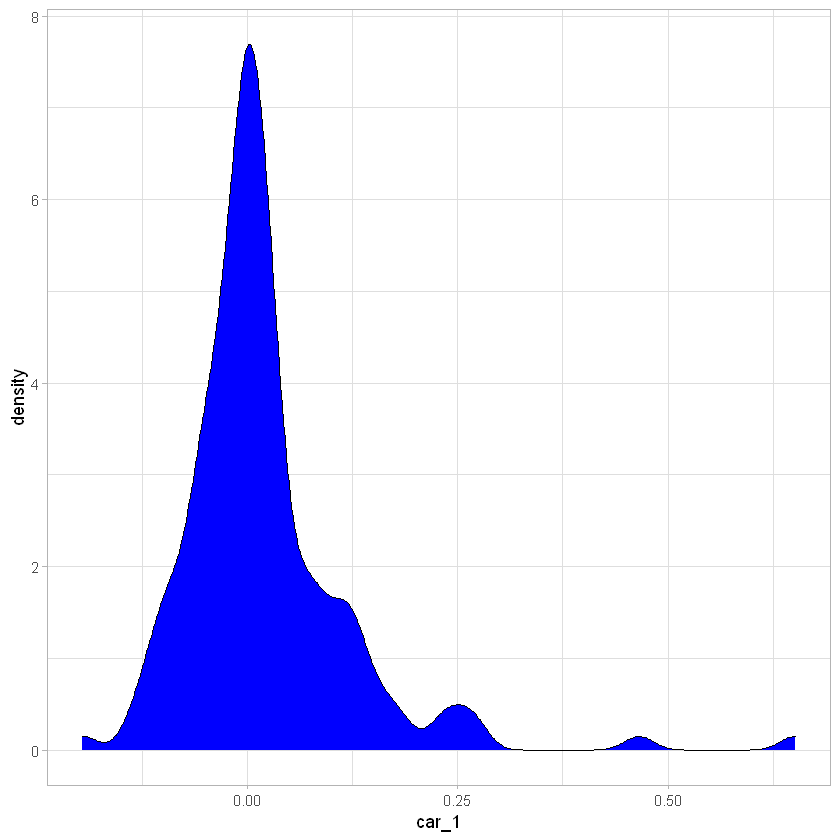

In [54]:
ggplot(data = data, aes(x = car_1)) + 
 geom_density(fill = "blue") + theme_light()

In [55]:
library(skimr)
skim(data)

── Data Summary ────────────────────────
                           Values
Name                       data  
Number of rows             153   
Number of columns          17    
_______________________          
Column type frequency:           
  factor                   10    
  numeric                  7     
________________________         
Group variables            None  

── Variable type: factor ───────────────────────────────────────────────────────
   skim_variable       n_missing complete_rate ordered n_unique
 1 covid_19                    0         1     FALSE          2
 2 sector                      0         1     FALSE         12
 3 diversification             0         1     FALSE          2
 4 cross_border                0         1     FALSE          2
 5 cash                        0         1     FALSE          3
 6 shares                     54         0.647 FALSE          2
 7 both                        0         1     FALSE          2
 8 p_e_dummy             

Warning message in is.null(text_repr) || nchar(text_repr) == 0L:
"'length(x) = 2 > 1' in coercion to 'logical(1)'"


,skim_type,skim_variable,n_missing,complete_rate,factor.ordered,factor.n_unique,factor.top_counts,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<lgl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,factor,covid_19,0,1.0000000,FALSE,2,"1: 83, 0: 70",NA,NA,NA,NA,NA,NA,NA,NA
2,factor,sector,0,1.0000000,FALSE,12,"Hig: 42, Ind: 22, Hea: 15, Inv: 13",NA,NA,NA,NA,NA,NA,NA,NA
3,factor,diversification,0,1.0000000,FALSE,2,"0: 121, 1: 32",NA,NA,NA,NA,NA,NA,NA,NA
4,factor,cross_border,0,1.0000000,FALSE,2,"0: 99, 1: 54",NA,NA,NA,NA,NA,NA,NA,NA
5,factor,cash,0,1.0000000,FALSE,3,"1: 83, n.d: 54, 0: 16",NA,NA,NA,NA,NA,NA,NA,NA
6,factor,shares,54,0.6470588,FALSE,2,"0: 55, 1: 44",NA,NA,NA,NA,NA,NA,NA,NA
7,factor,both,0,1.0000000,FALSE,2,"0: 125, 1: 28",NA,NA,NA,NA,NA,NA,NA,NA
8,factor,p_e_dummy,14,0.9084967,FALSE,2,"1: 79, 0: 60",NA,NA,NA,NA,NA,NA,NA,NA
9,factor,size_category,0,1.0000000,FALSE,3,"med: 78, lar: 68, sma: 7",NA,NA,NA,NA,NA,NA,NA,NA


In [59]:
library(corrr)
library(dplyr, warn.conflicts = FALSE)

data_cor = data %>% 
    select_if(is.numeric) %>%
    correlate()
data_cor


Correlation method: 'pearson'
Missing treated using: 'pairwise.complete.obs'




term,car_1,car_2,deal_value,ebitda_pos_2020,revenue_pos_2020,size_revenue,size_relative
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
car_1,NA,0.680334711,-0.065660323,0.019160103,0.08735553,-0.098066136,0.147343915
car_2,0.68033471,NA,0.028299193,0.123901699,0.17141542,0.002655602,-0.003221881
deal_value,-0.06566032,0.028299193,NA,0.008844258,-0.02489457,0.203976291,-0.032768224
ebitda_pos_2020,0.01916010,0.123901699,0.008844258,NA,0.46006559,-0.171312691,-0.008027119
revenue_pos_2020,0.08735553,0.171415419,-0.024894572,0.460065594,NA,-0.343510289,-0.012775273
size_revenue,-0.09806614,0.002655602,0.203976291,-0.171312691,-0.34351029,NA,-0.114740299
size_relative,0.14734392,-0.003221881,-0.032768224,-0.008027119,-0.01277527,-0.114740299,NA


Don't know how to automatically pick scale for object of type noquote. Defaulting to continuous.



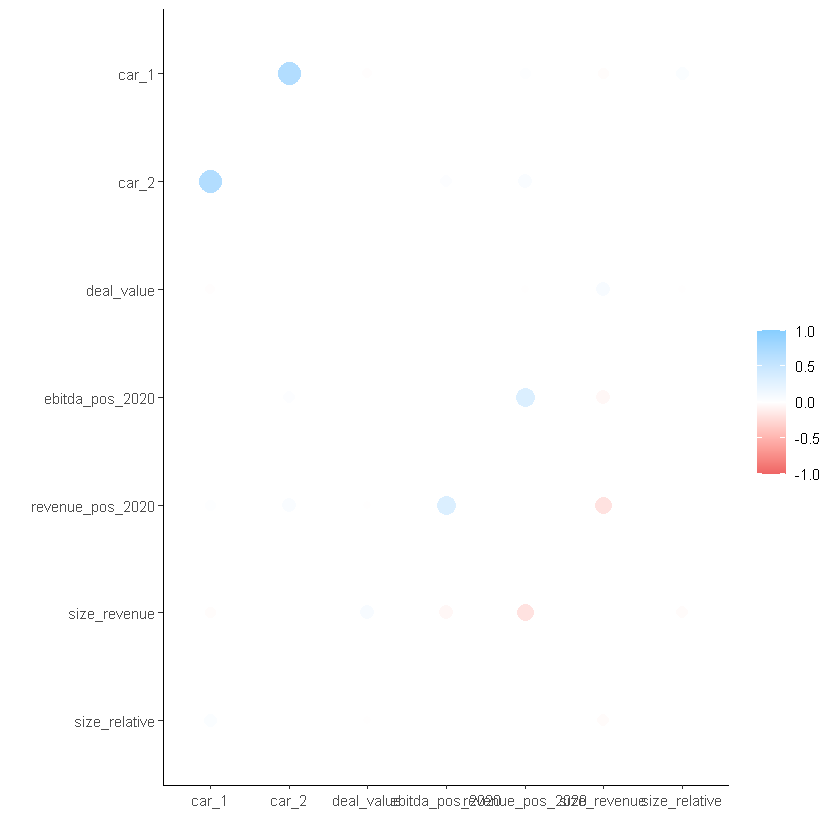

In [60]:
rplot(data_cor)

In [79]:
data_cov = data %>% 
    select_if(is.numeric) %>%
    colpair_map(stats::cov)
data_cov %>% stretch()

x,y,r
<chr>,<chr>,<dbl>
car_1,car_1,NA
car_1,car_2,9.632492e-03
car_1,deal_value,NA
car_1,ebitda_pos_2020,9.641899e-04
car_1,revenue_pos_2020,4.367058e-03
car_1,size_revenue,-4.565163e+02
car_1,size_relative,NA
car_2,car_1,9.632492e-03
car_2,car_2,NA


In [77]:
calc_ttest_p_value <- function(vec_a, vec_b){
  t.test(vec_a, vec_b)$p.value
}
data_num = data %>% select_if(is.numeric)
colpair_map(data_num, calc_ttest_p_value)

term,car_1,car_2,deal_value,ebitda_pos_2020,revenue_pos_2020,size_revenue,size_relative
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
car_1,NA,3.312768e-01,1.294096e-02,5.546304e-20,1.215525e-28,2.663948e-06,3.124686e-03
car_2,3.312768e-01,NA,1.294030e-02,1.222615e-20,2.012137e-29,2.663906e-06,2.903764e-03
deal_value,1.294096e-02,1.294030e-02,NA,1.296176e-02,1.296775e-02,2.745255e-05,1.302204e-02
ebitda_pos_2020,5.546304e-20,1.222615e-20,1.296176e-02,NA,2.981147e-02,2.665297e-06,2.680187e-02
revenue_pos_2020,1.215525e-28,2.012137e-29,1.296775e-02,2.981147e-02,NA,2.665685e-06,4.562489e-02
size_revenue,2.663948e-06,2.663906e-06,2.745255e-05,2.665297e-06,2.665685e-06,NA,2.669196e-06
size_relative,3.124686e-03,2.903764e-03,1.302204e-02,2.680187e-02,4.562489e-02,2.669196e-06,NA


In [74]:

library(data.table)

data_cat <- data[,colnames(data)[grepl('factor|logical|character',sapply(data,class))],with=F]

library(rcompanion)

colpair_map(data_cat, cramerV, digits = 2)

term,covid_19,sector,diversification,cross_border,cash,shares,both,p_e_dummy,size_category,dummy_relative_size
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
covid_19,NA,0.38,0.012,0.120,0.082,0.110,0.061,0.120,0.06,0.130
sector,0.380,NA,0.500,0.380,0.300,0.300,0.350,0.270,0.50,0.360
diversification,0.012,0.50,NA,0.250,0.500,0.023,0.120,0.110,0.22,0.330
cross_border,0.120,0.38,0.250,NA,0.520,0.250,0.031,0.120,0.15,0.360
cash,0.082,0.30,0.500,0.520,NA,0.280,0.430,0.072,0.16,0.400
shares,0.110,0.30,0.023,0.250,0.280,NA,0.560,0.066,0.26,0.160
both,0.061,0.35,0.120,0.031,0.430,0.560,NA,0.140,0.30,0.290
p_e_dummy,0.120,0.27,0.110,0.120,0.072,0.066,0.140,NA,0.15,0.072
size_category,0.060,0.50,0.220,0.150,0.160,0.260,0.300,0.150,NA,0.270


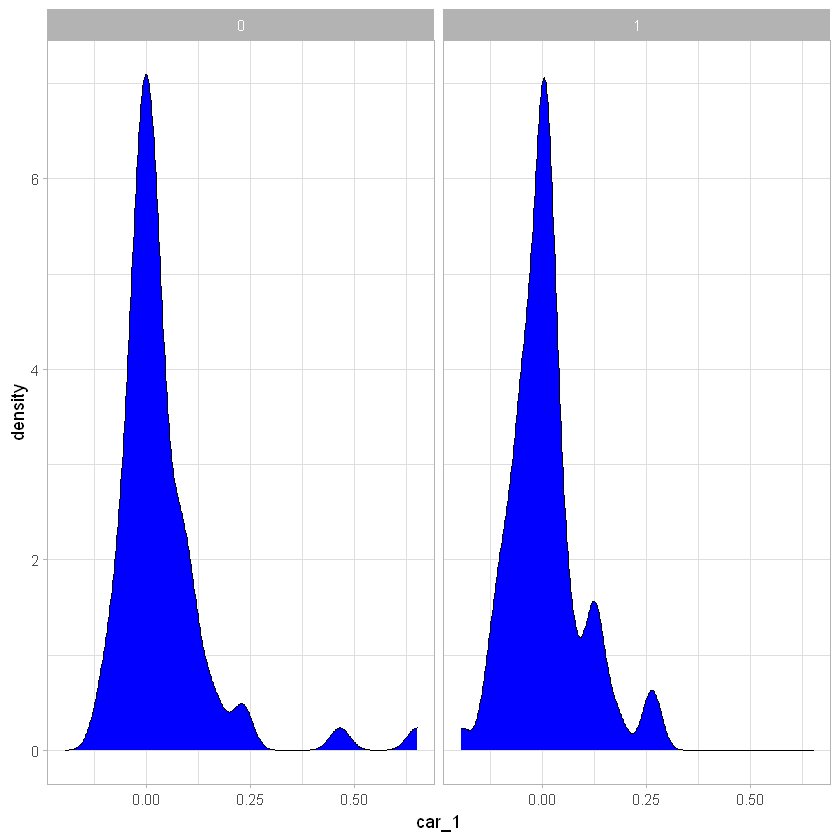

In [83]:
ggplot(data = data, aes(x = car_1)) + 
 geom_density(fill = "blue")+facet_wrap(~covid_19)+theme_light()

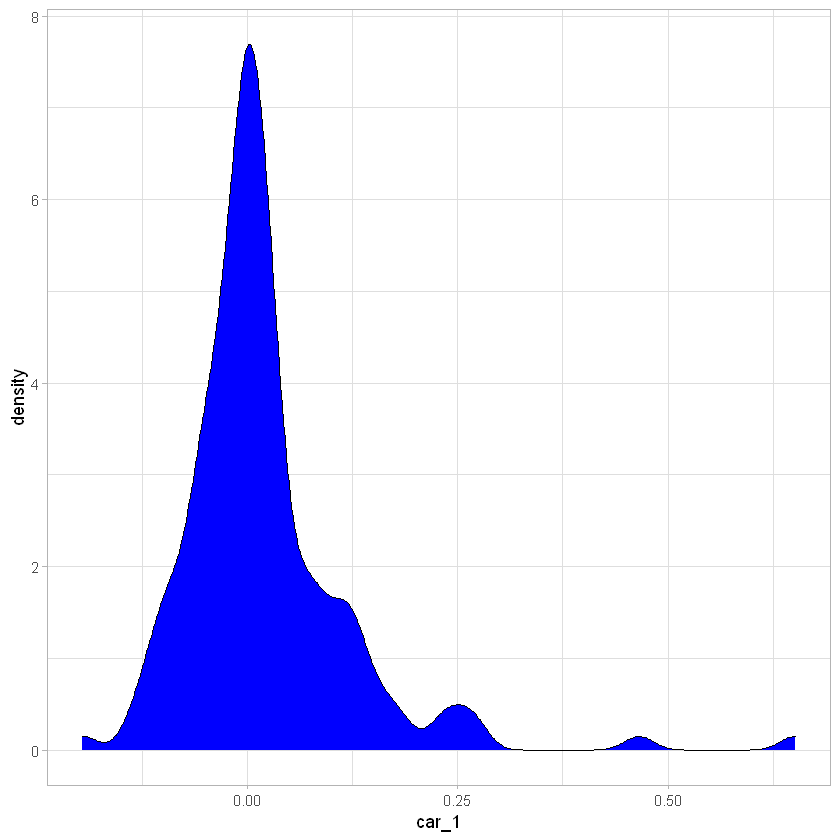

In [82]:
ggplot(data = data, aes(x = car_1)) + 
 geom_density(fill = "blue") + theme_light()

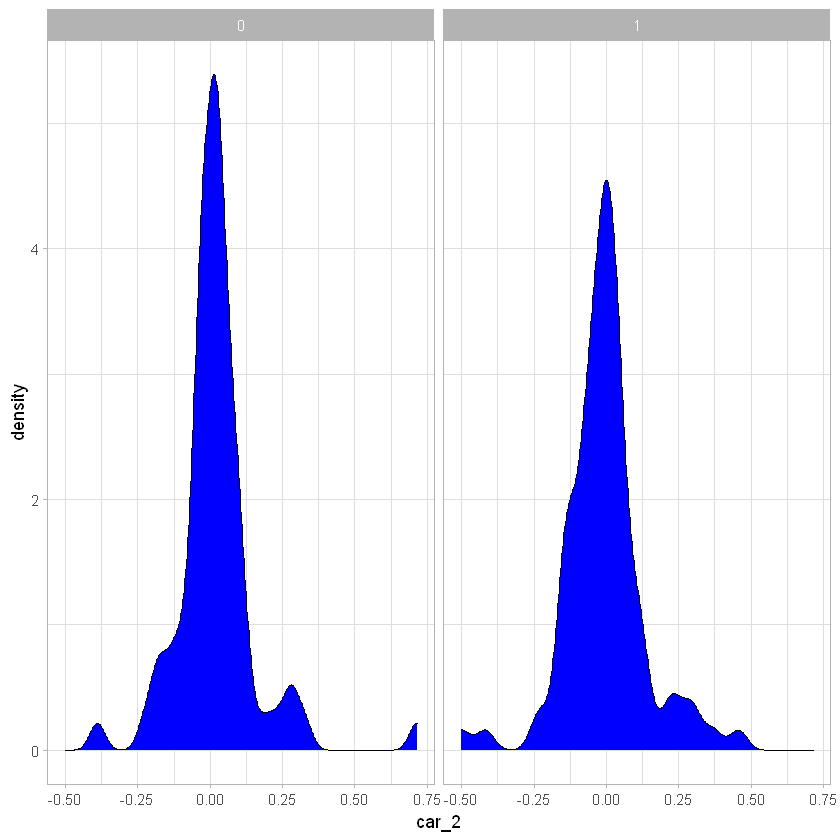

In [84]:
ggplot(data = data, aes(x = car_2)) + 
 geom_density(fill = "blue")+facet_wrap(~covid_19)+theme_light()

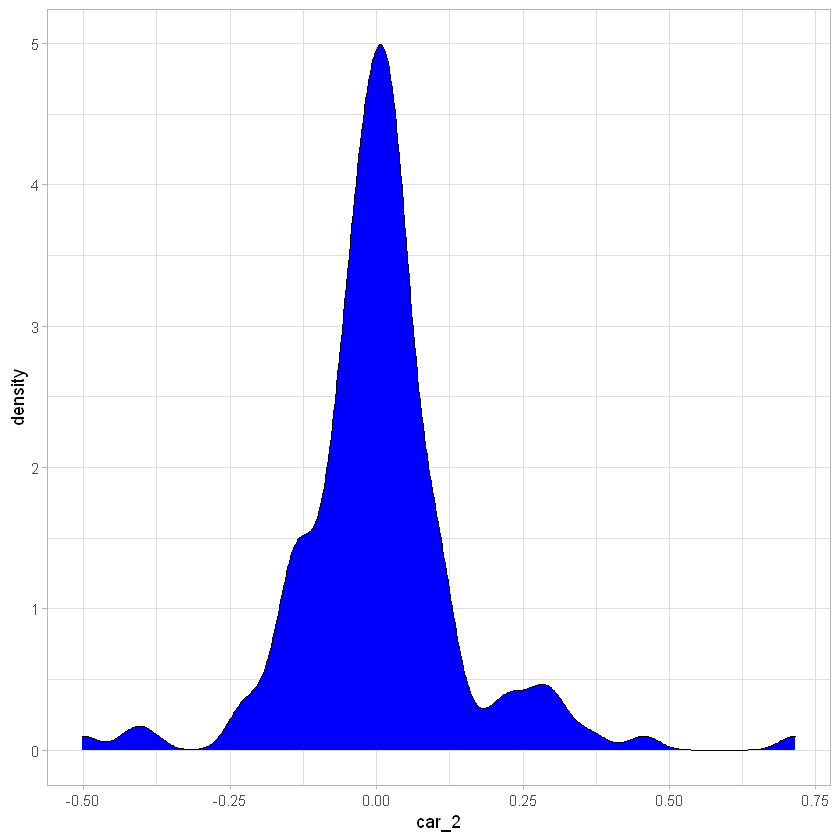

In [85]:
ggplot(data = data, aes(x = car_2)) + 
 geom_density(fill = "blue") + theme_light()

In [90]:
library(DescTools)
data$car_1 = Winsorize(data$car_1)
data$car_2 = Winsorize(data$car_2)

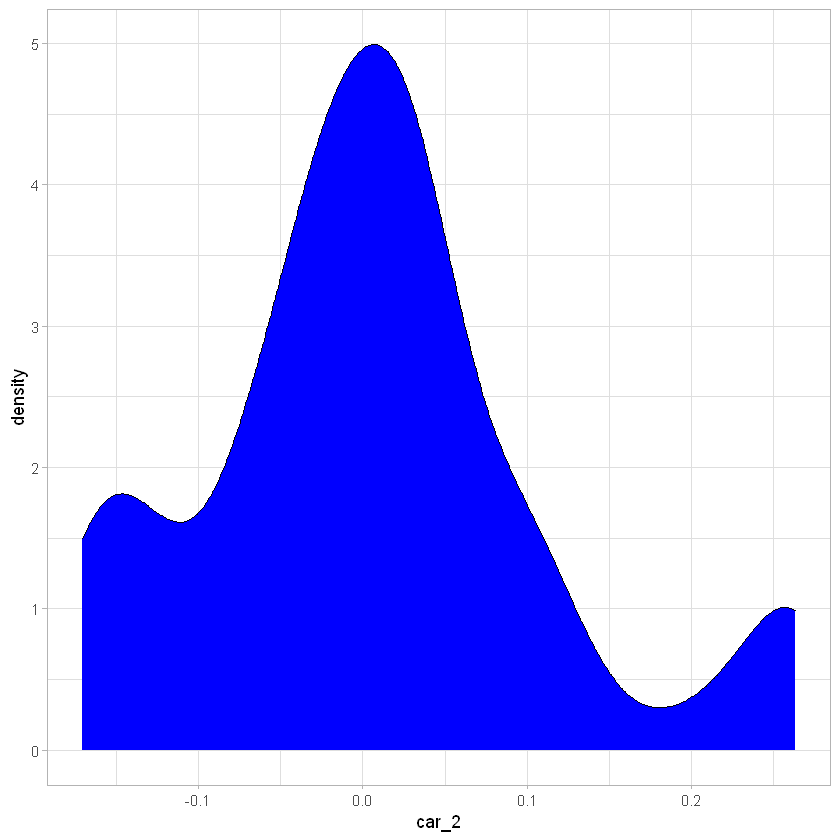

In [91]:
ggplot(data = data, aes(x = car_2)) + 
 geom_density(fill = "blue") + theme_light()

In [ ]:
T test was used to assess the relationship between numerical data, which was normally distributed as shown by the plots above.

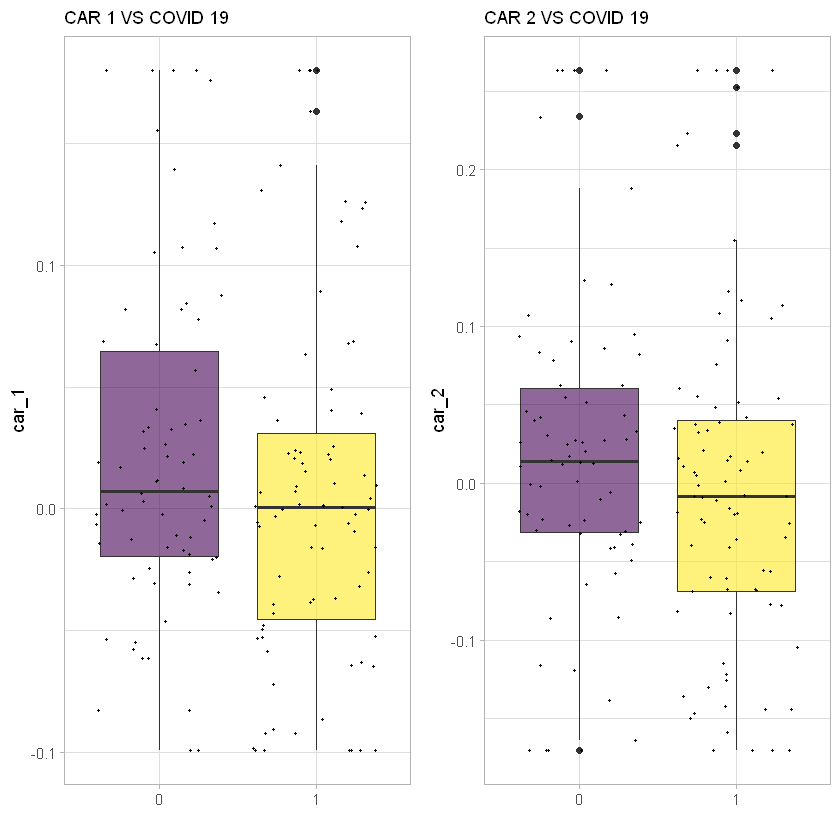

In [118]:
library(viridis)
p1 = data %>%
  ggplot( aes(x=covid_19, y=car_1, fill=covid_19)) +
    geom_boxplot() +
    scale_fill_viridis(discrete = TRUE, alpha=0.6) +
    geom_jitter(color="black", size=0.4, alpha=0.9) +
    theme_light() +
    theme(
      legend.position="none",
      plot.title = element_text(size=11)
    ) +
    ggtitle("CAR 1 VS COVID 19") +
    xlab("")
p2 = data %>%
  ggplot( aes(x=covid_19, y=car_2, fill=covid_19)) +
    geom_boxplot() +
    scale_fill_viridis(discrete = TRUE, alpha=0.6) +
    geom_jitter(color="black", size=0.4, alpha=0.9) +
    theme_light() +
    theme(
      legend.position="none",
      plot.title = element_text(size=11)
    ) +
    ggtitle("CAR 2 VS COVID 19") +
    xlab("")

ggarrange(p1, p2)

In [131]:
# function to extract coefficients
extractCoefs <- function(x = mod1_CAR1){
  sum <- summary(x)

  df <- data.frame(sum$coefficients)
  names(df) <- c("Estimate", "Std_error", "T_value", "P_value")
  rownames(df)[1] <- "COVID190"
  df <- round(df, 3)
  df$Coefficient <- rownames(df)
  df$Dependent <- names(x$model)[1]
  rownames(df) <- NULL
  df <- df[, c("Dependent", "Coefficient", names(df)[-which(names(df) %in% c("Coefficient", "Dependent"))]) ]
  return(df)
}

In [132]:
mod1_CAR1 <- lm(car_1 ~ covid_19, data = data)
summary(mod1_CAR1)


Call:
lm(formula = car_1 ~ covid_19, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.12238 -0.04531 -0.00861  0.03309  0.17401 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.02302    0.00858   2.682  0.00812 **
covid_191   -0.01681    0.01165  -1.443  0.15118   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.07179 on 151 degrees of freedom
Multiple R-squared:  0.0136,	Adjusted R-squared:  0.007064 
F-statistic: 2.081 on 1 and 151 DF,  p-value: 0.1512


In [133]:
extractCoefs(mod1_CAR1)

Dependent,Coefficient,Estimate,Std_error,T_value,P_value
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
car_1,COVID190,0.023,0.009,2.682,0.008
car_1,covid_191,-0.017,0.012,-1.443,0.151


In [119]:
mod1_CAR2 <- lm(car_2 ~ covid_19, data = data)
summary(mod1_CAR2)


Call:
lm(formula = car_2 ~ covid_19, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.187805 -0.058602 -0.005425  0.043998  0.265538 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.01722    0.01257   1.370    0.173
covid_191   -0.01942    0.01707  -1.138    0.257

Residual standard error: 0.1052 on 151 degrees of freedom
Multiple R-squared:  0.008503,	Adjusted R-squared:  0.001937 
F-statistic: 1.295 on 1 and 151 DF,  p-value: 0.2569


In [134]:
extractCoefs(mod1_CAR2)

Dependent,Coefficient,Estimate,Std_error,T_value,P_value
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
car_2,COVID190,0.017,0.013,1.370,0.173
car_2,covid_191,-0.019,0.017,-1.138,0.257


There is a marginally significant negative effect of COVID19 on CAR1, using a confidence interval of 80% (p < 0.2) but not in CAR2.On this significant level, the relationship between Covid 19 and Car 2 is not statistically significant, which means, car 2 was not impacted heavily or in a meaningful manner by Covid 19

Note that a linear model with a two level factor (with similar sample size per factor) is equivalent to a T-student test. Then, coefficients here show the mean of the response variable for group COVID19 = 0 and the effect of the second level. Then, for CAR1, the mean of the COVID 19 = 0 group is 0.023, while the effect of the second level (COVID 19 = 1) is -0.017. Then, the mean for the second level in CAR1 is 0.023 - 0.017= 0.06). The significance of COVID191 shows whether the difference is statistically significative.

### Assumption One: Linearity of the Data

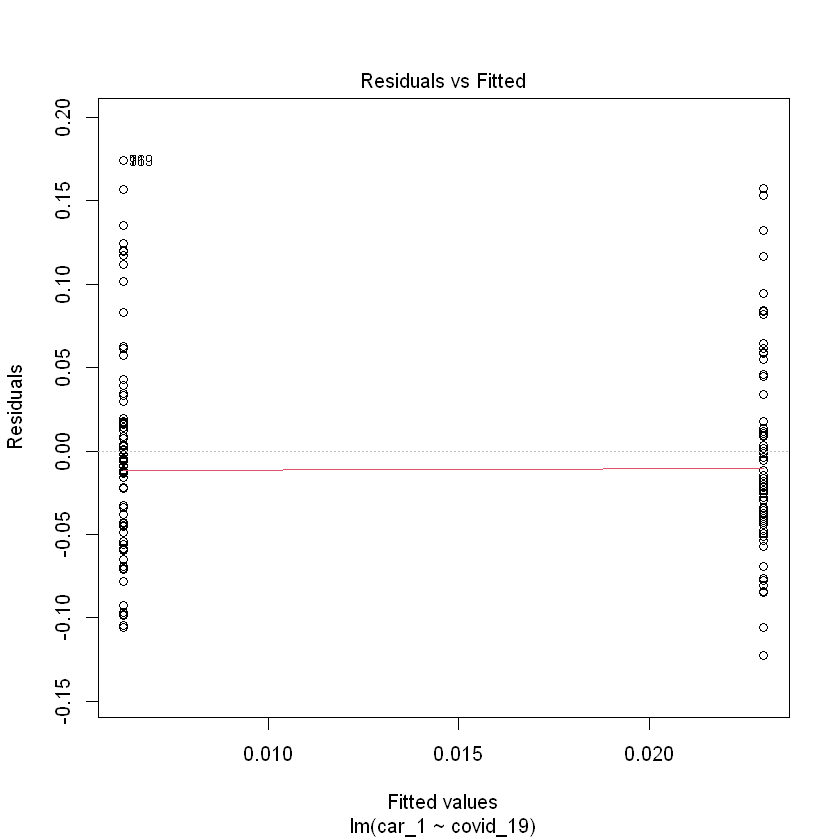

In [108]:
plot(mod1_CAR1, 1)

In the above plot we can see that there is no clear pattern in the residual plot. This would indicate that we meet the assumption that there is a linear relationship between the predictors and the outcome variable.

### Assumption Two: Predictors (x) Are Independent and Observed with Negligible Error

In [111]:
library(car)
durbinWatsonTest(mod1_CAR1)

 lag Autocorrelation D-W Statistic p-value
   1     -0.02223423      2.040698   0.836
 Alternative hypothesis: rho != 0

The null hypothesis states that the errors are not auto-correlated with themselves (they are independent). Thus, if we achieve a p-value > 0.05, 0.836,  we would fail to reject the null hypothesis. This would give us enough evidence to state that our independence assumption is met!

### Assumption Three: Residual Errors Have a Mean Value of Zero

In the above plot, we can see that the red line is below 0 for low fitted values and high fitted values. This indicates that the residual errors have a mean value of below 0

### Assumption Four: Residual Errors Have Constant Variance

We can check this assumption using the Scale-Location plot. In this plot we can see the fitted values vs the square root of the standardized residuals. Ideally, we would want to see the residual points equally spread around the red line, which would indicate constant variance.

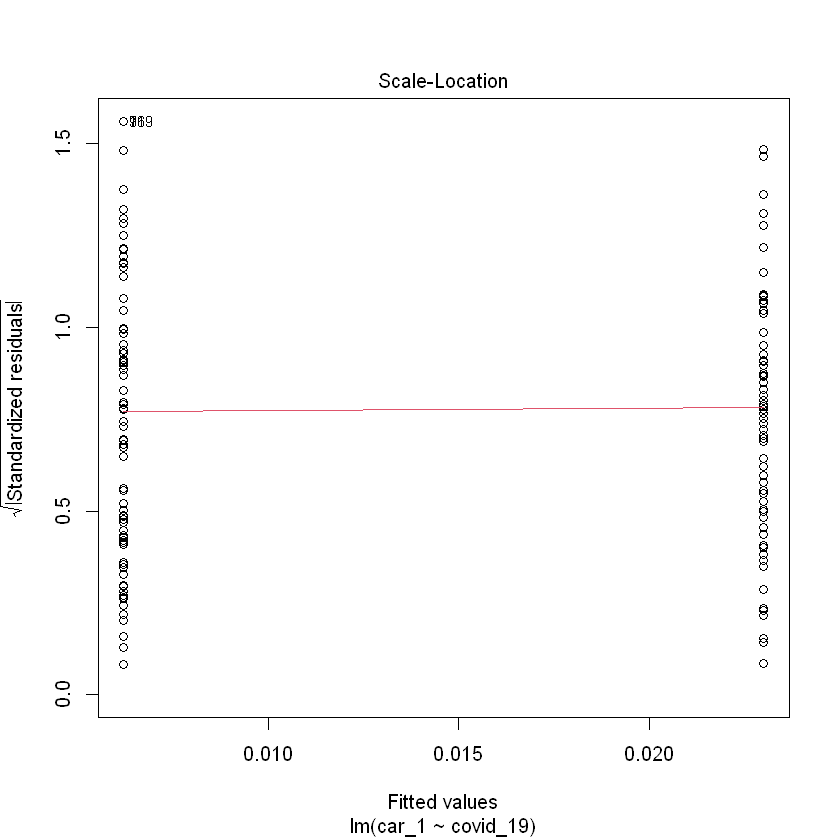

In [117]:
plot(mod1_CAR1, 3)

In [116]:
library(car)
ncvTest(lm(car_1 ~ covid_19, data = data))

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.2674188, Df = 1, p = 0.60507


The null hypothesis states that there is constant variance. a pvalue > 0.05, suggests you would fail to reject the null. This means you have enough evidence to state that your assumption is met!

All assumptions have been met, incuding the residually errors are normally distributed.

There is a marginally significant negative effect of COVID19 on CAR1 (p < 0.1) but not in CAR2.

Note that a linear model with a two level factor (with similar sample size per factor) is equivalent to a T-student test. Then, coefficients here show the mean of the response variable for group COVID19 = 0 and the effect of the second level. Then, for CAR1, the mean of the COVID 19 = 0 group is 0.035, while the effect of the second level (COVID 19 = 1) is -0.028. Then, the mean for the second level in CAR1 is 0.035 - 0.028 = 0.07). The significance of COVID191 shows whether the difference is statistically significative.

## HYPOTHESIS 2

**The size has a positive impact on the cumulative abnormal return (CAR = dependent variable) during COVID-19.**

In [136]:
mod2_CAR1 <- lm(car_1 ~ covid_19 * size_revenue, data = data)
summary(mod2_CAR1)


Call:
lm(formula = car_1 ~ covid_19 * size_revenue, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.127218 -0.047014 -0.006069  0.033527  0.171630 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)   
(Intercept)             2.786e-02  9.494e-03   2.935  0.00387 **
covid_191              -1.913e-02  1.259e-02  -1.519  0.13077   
size_revenue           -1.850e-07  1.561e-07  -1.185  0.23779   
covid_191:size_revenue -3.387e-08  2.708e-07  -0.125  0.90063   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0717 on 149 degrees of freedom
Multiple R-squared:  0.02913,	Adjusted R-squared:  0.009578 
F-statistic:  1.49 on 3 and 149 DF,  p-value: 0.2196


In [138]:
extractCoefs(mod2_CAR1)

Dependent,Coefficient,Estimate,Std_error,T_value,P_value
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
car_1,COVID190,0.028,0.009,2.935,0.004
car_1,covid_191,-0.019,0.013,-1.519,0.131
car_1,size_revenue,0.000,0.000,-1.185,0.238
car_1,covid_191:size_revenue,0.000,0.000,-0.125,0.901


In [141]:
mod2_CAR2 <- lm(car_2 ~ covid_19 * size_revenue, data = data)
summary(mod2_CAR2)


Call:
lm(formula = car_2 ~ covid_19 * size_revenue, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.187224 -0.060022 -0.004009  0.045084  0.264019 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)
(Intercept)             1.663e-02  1.401e-02   1.187    0.237
covid_191              -1.730e-02  1.858e-02  -0.931    0.353
size_revenue            2.281e-08  2.304e-07   0.099    0.921
covid_191:size_revenue -1.555e-07  3.997e-07  -0.389    0.698

Residual standard error: 0.1058 on 149 degrees of freedom
Multiple R-squared:  0.009665,	Adjusted R-squared:  -0.01027 
F-statistic: 0.4847 on 3 and 149 DF,  p-value: 0.6934


In [142]:
extractCoefs(mod2_CAR2)

Dependent,Coefficient,Estimate,Std_error,T_value,P_value
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
car_2,COVID190,0.017,0.014,1.187,0.237
car_2,covid_191,-0.017,0.019,-0.931,0.353
car_2,size_revenue,0.000,0.000,0.099,0.921
car_2,covid_191:size_revenue,0.000,0.000,-0.389,0.698


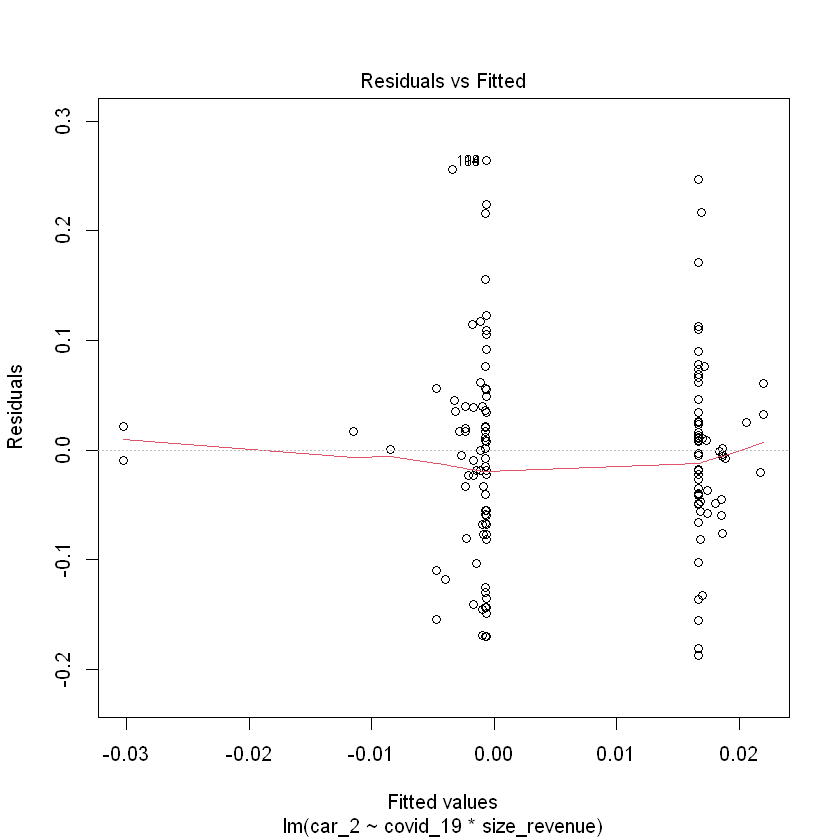

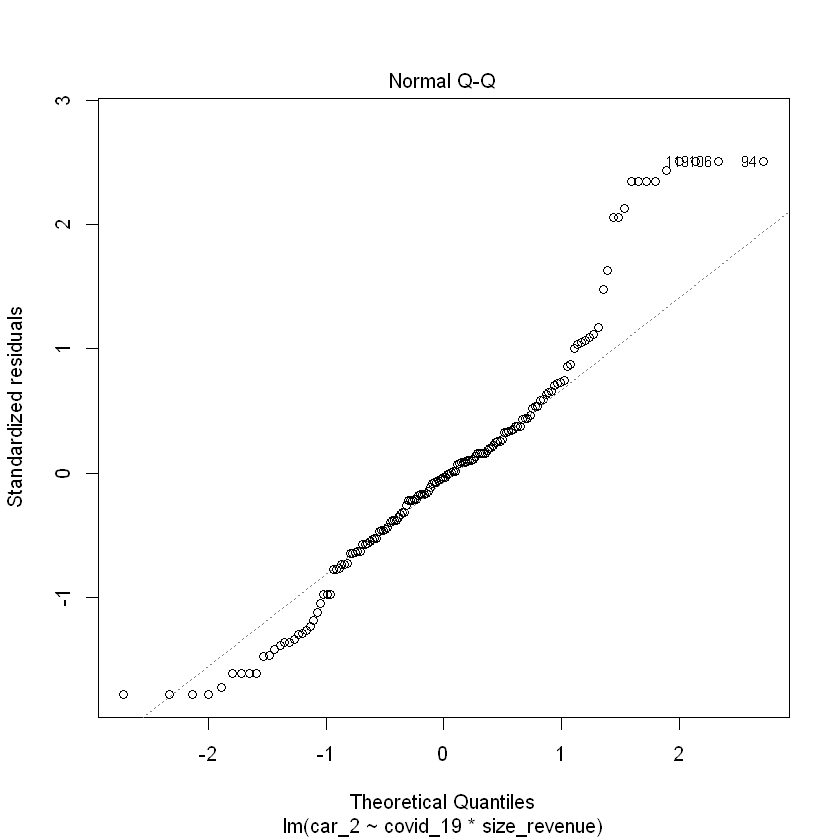

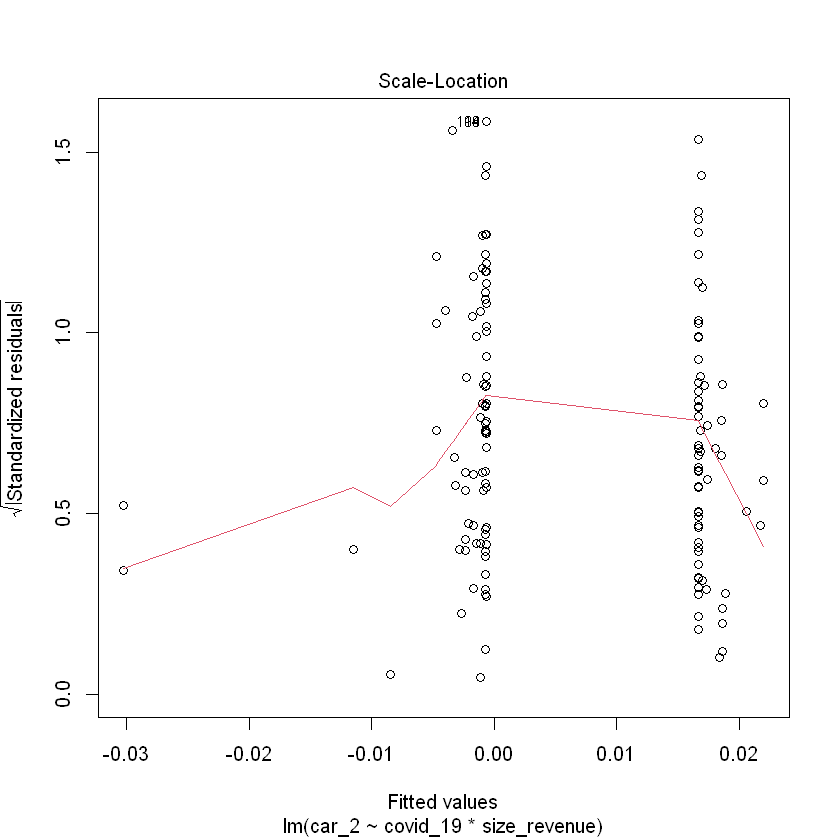

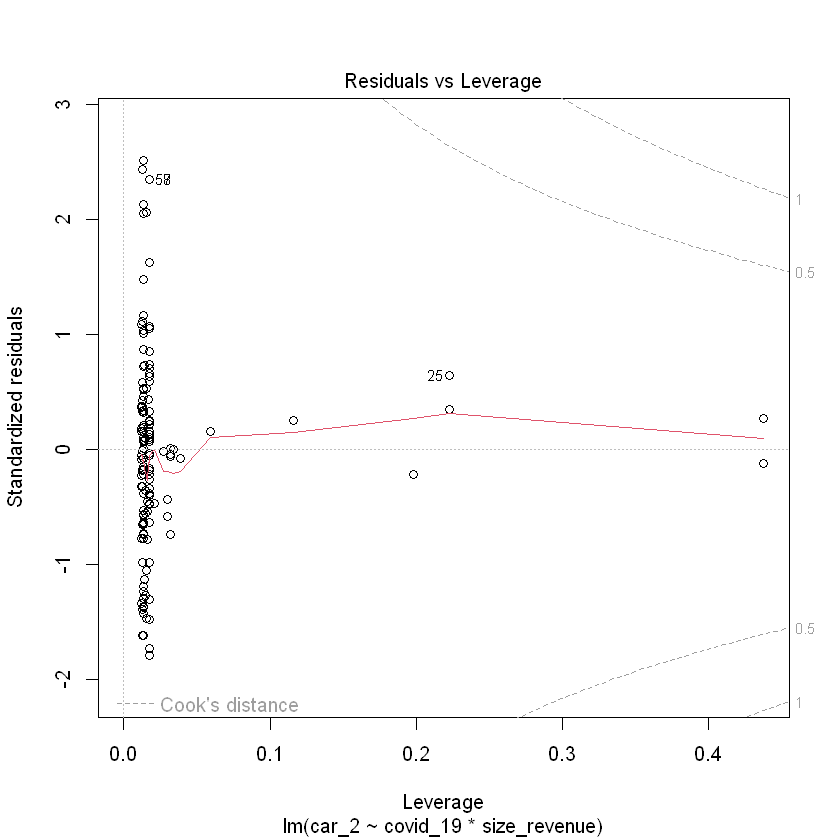

In [194]:
plot(mod2_CAR2)

Use the principles of checking for assumptions on linear models from the first hypothesis test.

The effect of covid on CAR1 is maintained, but the relatiopnship is thought to be statistically significant at a much lower significant level, but there is no effect of size revenue nor interaction between size revenue and COVID. No significant effects are detected for CAR2.

## Hypothesis 3

**The financial strength has a positive impact on the cumulative abnormal return (CAR = dependent variable) during COVID-19.**

In [163]:
mod3_CAR1 <- lm(car_1 ~ covid_19 * ebitda_pos_2020, data = data)
summary(mod3_CAR1)


Call:
lm(formula = car_1 ~ covid_19 * ebitda_pos_2020, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.126919 -0.047089 -0.009289  0.034141  0.178161 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)  
(Intercept)                0.02756    0.01075   2.565   0.0113 *
covid_191                 -0.02550    0.01577  -1.617   0.1080  
ebitda_pos_2020           -0.01272    0.01798  -0.707   0.4805  
covid_191:ebitda_pos_2020  0.02055    0.02397   0.857   0.3927  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.07209 on 149 degrees of freedom
Multiple R-squared:  0.0185,	Adjusted R-squared:  -0.001263 
F-statistic: 0.9361 on 3 and 149 DF,  p-value: 0.4249


In [164]:
kable(extractCoefs(mod3_CAR1))



|Dependent |Coefficient               | Estimate| Std_error| T_value| P_value|
|:---------|:-------------------------|--------:|---------:|-------:|-------:|
|car_1     |COVID190                  |    0.028|     0.011|   2.565|   0.011|
|car_1     |covid_191                 |   -0.026|     0.016|  -1.617|   0.108|
|car_1     |ebitda_pos_2020           |   -0.013|     0.018|  -0.707|   0.480|
|car_1     |covid_191:ebitda_pos_2020 |    0.021|     0.024|   0.857|   0.393|

At a 90% level of siginificance, the relationship/interaction between car 1 and Covid is significant. The other interactions are considered not to be significant, at any other higher level of significance. Taking the p-value of the model at a 90% level of significance, the relationship  between car1, EBITDA and COVID 19 is not significant. Examining the F-value, it is less than 1, suggesting that the null hypothesis: That the car 1 and covid19 + ebitda have a significant relationship is false.

In [165]:
mod3_CAR2 <- lm(car_2 ~ covid_19 * ebitda_pos_2020, data = data)
summary(mod3_CAR2)


Call:
lm(formula = car_2 ~ covid_19 * ebitda_pos_2020, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.202286 -0.063184 -0.002084  0.045420  0.276011 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)
(Intercept)                0.009180   0.015707   0.584    0.560
covid_191                 -0.021850   0.023052  -0.948    0.345
ebitda_pos_2020            0.022527   0.026283   0.857    0.393
covid_191:ebitda_pos_2020 -0.002772   0.035040  -0.079    0.937

Residual standard error: 0.1054 on 149 degrees of freedom
Multiple R-squared:  0.01813,	Adjusted R-squared:  -0.001636 
F-statistic: 0.9172 on 3 and 149 DF,  p-value: 0.4342


In [166]:
kable(extractCoefs(mod3_CAR2))



|Dependent |Coefficient               | Estimate| Std_error| T_value| P_value|
|:---------|:-------------------------|--------:|---------:|-------:|-------:|
|car_2     |COVID190                  |    0.009|     0.016|   0.584|   0.560|
|car_2     |covid_191                 |   -0.022|     0.023|  -0.948|   0.345|
|car_2     |ebitda_pos_2020           |    0.023|     0.026|   0.857|   0.393|
|car_2     |covid_191:ebitda_pos_2020 |   -0.003|     0.035|  -0.079|   0.937|

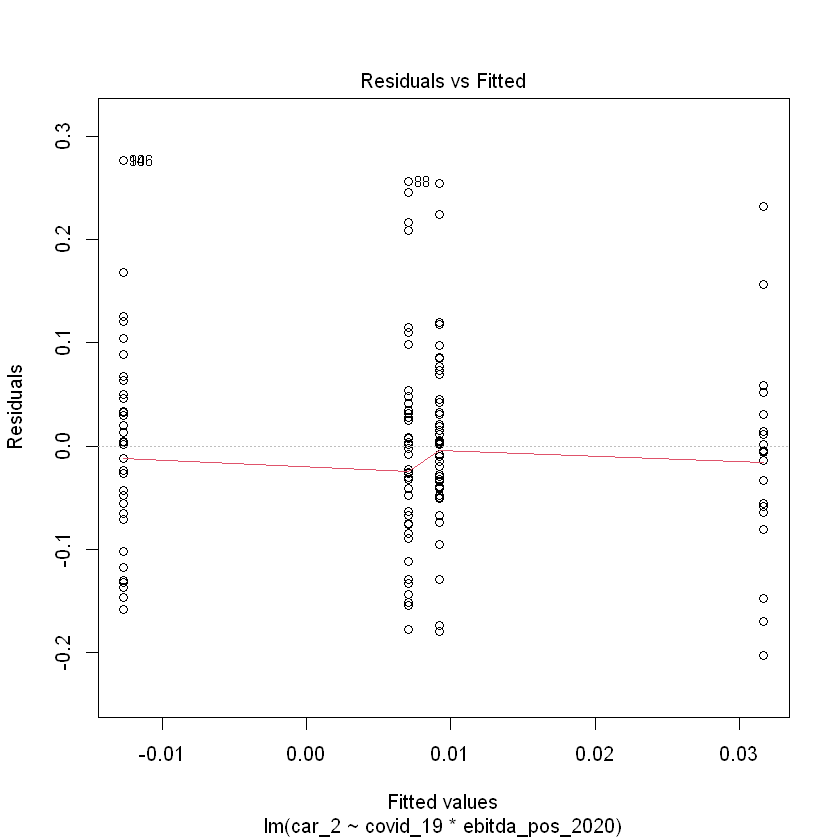

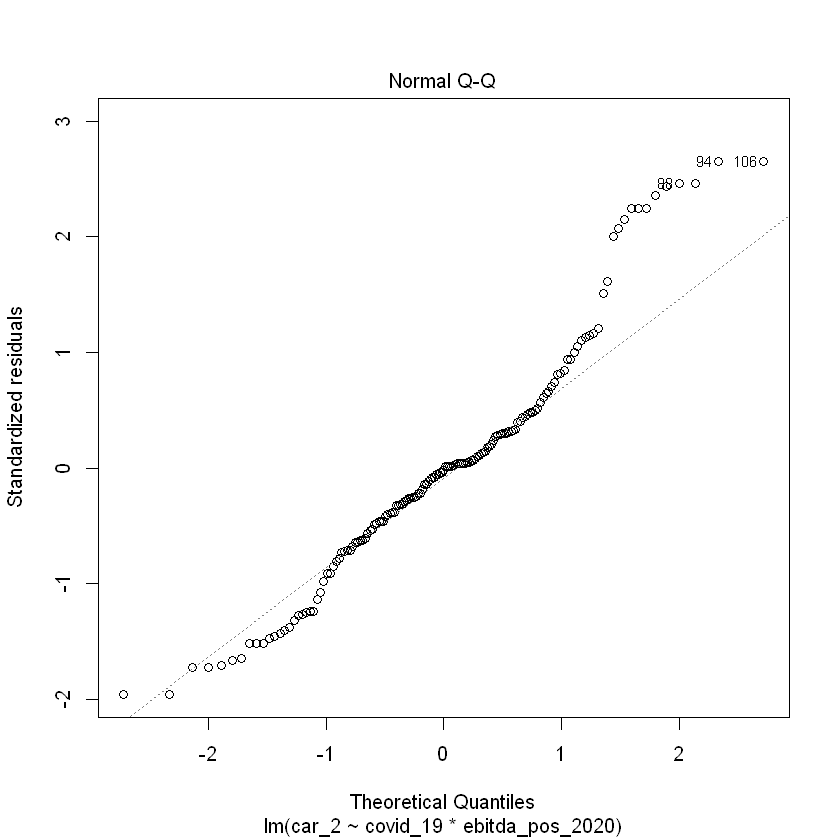

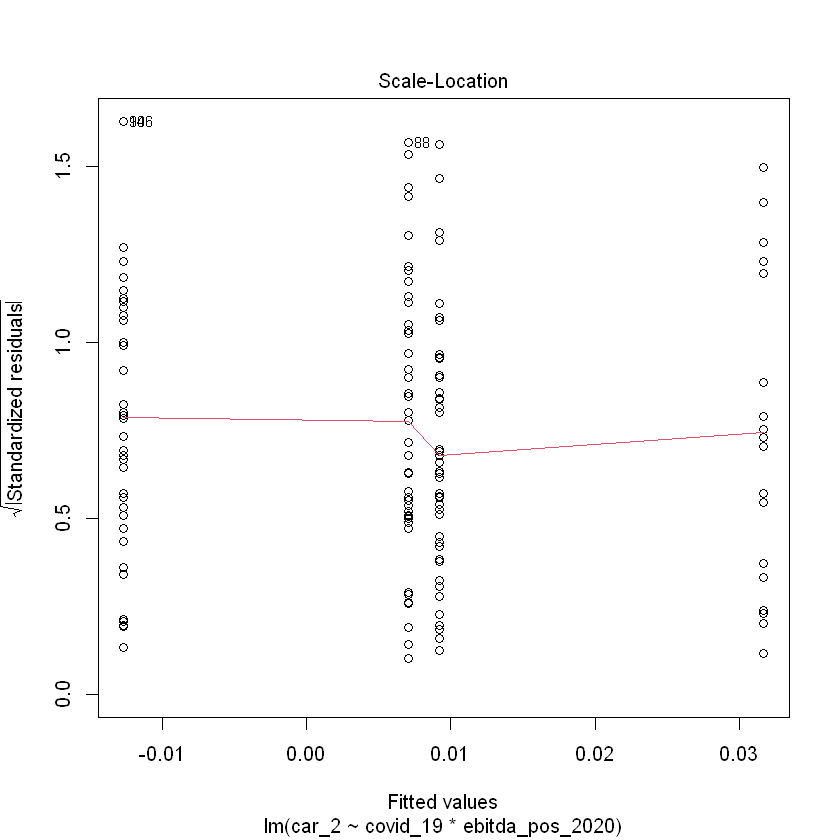

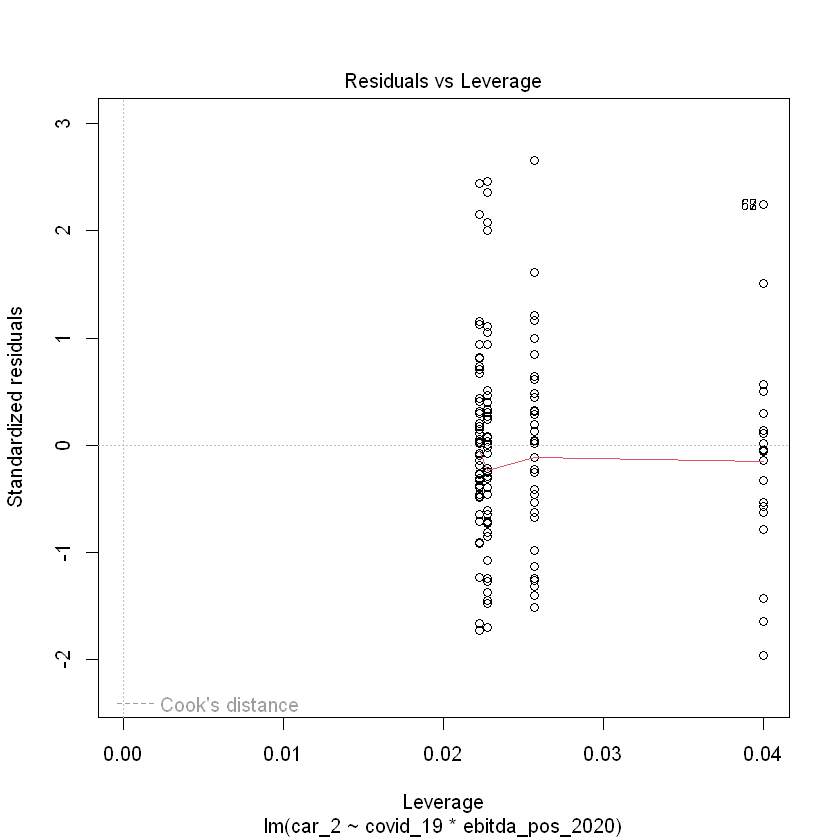

In [195]:
plot(mod3_CAR2)

There are no significant effects on CAR2 that are detected.

In [168]:
mod4_CAR1 <- lm(car_1 ~ covid_19 * revenue_pos_2020, data = data)
summary(mod4_CAR1)


Call:
lm(formula = car_1 ~ covid_19 * revenue_pos_2020, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.13178 -0.04482 -0.00803  0.03097  0.17378 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)
(Intercept)                 0.009730   0.013344   0.729    0.467
covid_191                  -0.003821   0.017931  -0.213    0.832
revenue_pos_2020            0.022685   0.017436   1.301    0.195
covid_191:revenue_pos_2020 -0.022153   0.023608  -0.938    0.350

Residual standard error: 0.07186 on 149 degrees of freedom
Multiple R-squared:  0.02468,	Adjusted R-squared:  0.005046 
F-statistic: 1.257 on 3 and 149 DF,  p-value: 0.2914


In [169]:
kable(extractCoefs(mod4_CAR1))



|Dependent |Coefficient                | Estimate| Std_error| T_value| P_value|
|:---------|:--------------------------|--------:|---------:|-------:|-------:|
|car_1     |COVID190                   |    0.010|     0.013|   0.729|   0.467|
|car_1     |covid_191                  |   -0.004|     0.018|  -0.213|   0.832|
|car_1     |revenue_pos_2020           |    0.023|     0.017|   1.301|   0.195|
|car_1     |covid_191:revenue_pos_2020 |   -0.022|     0.024|  -0.938|   0.350|

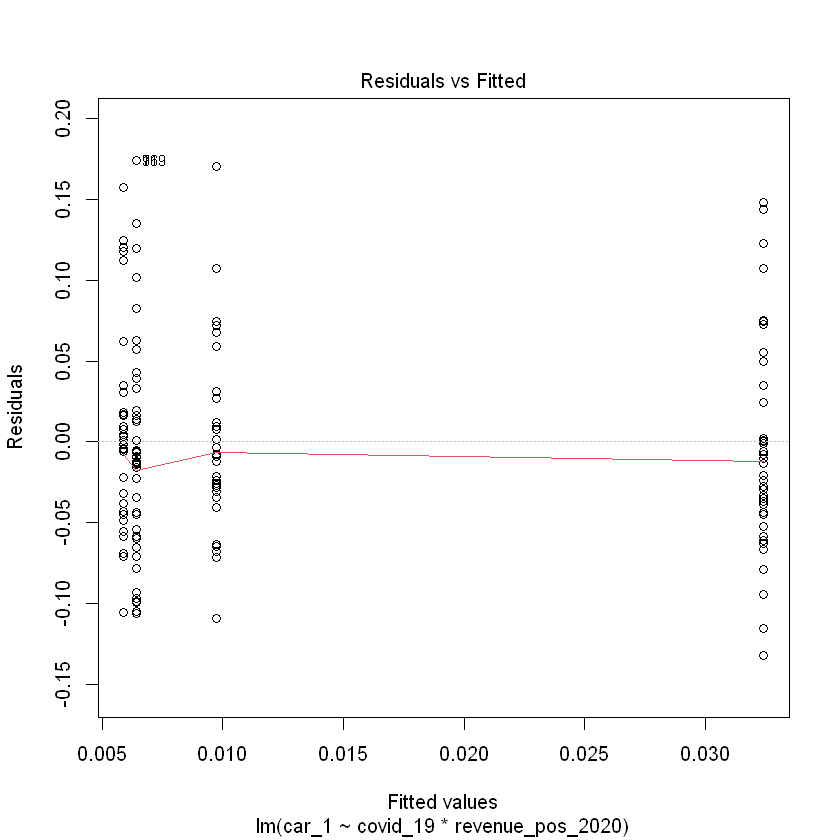

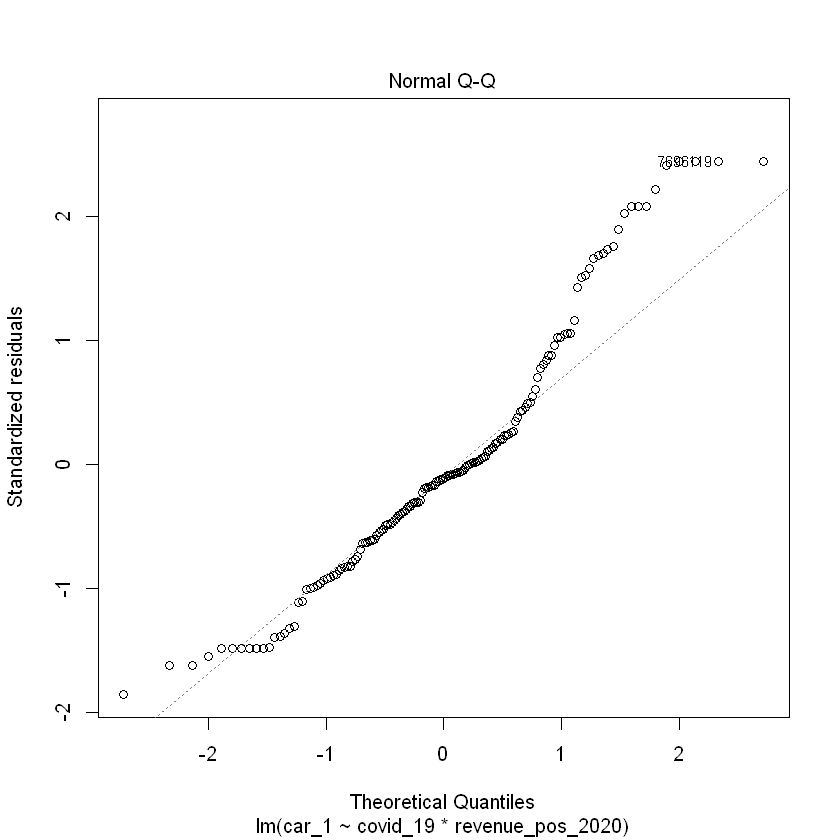

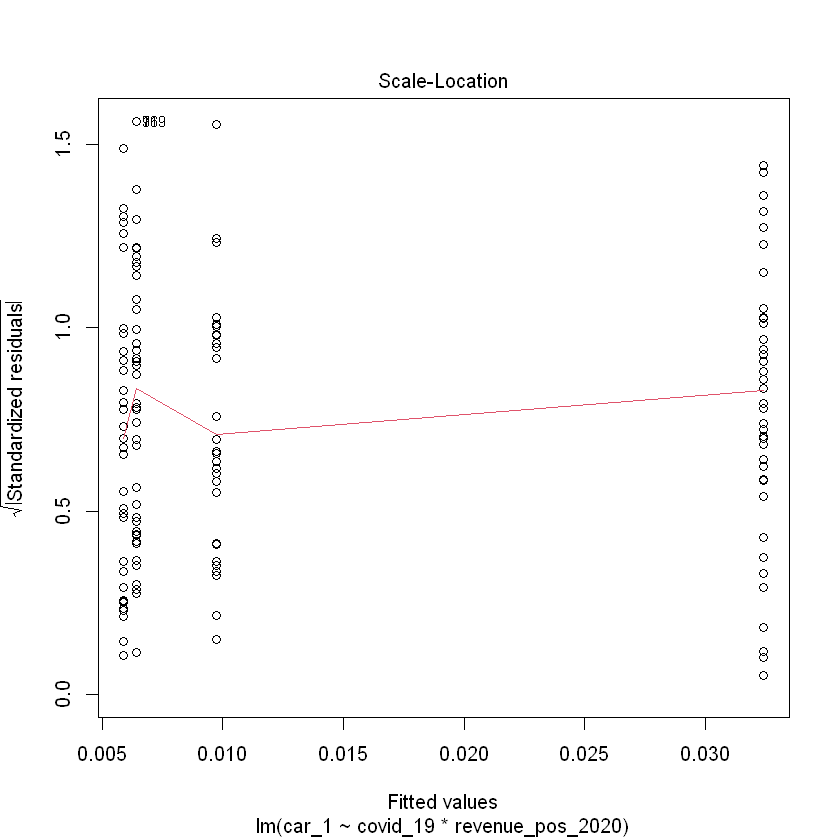

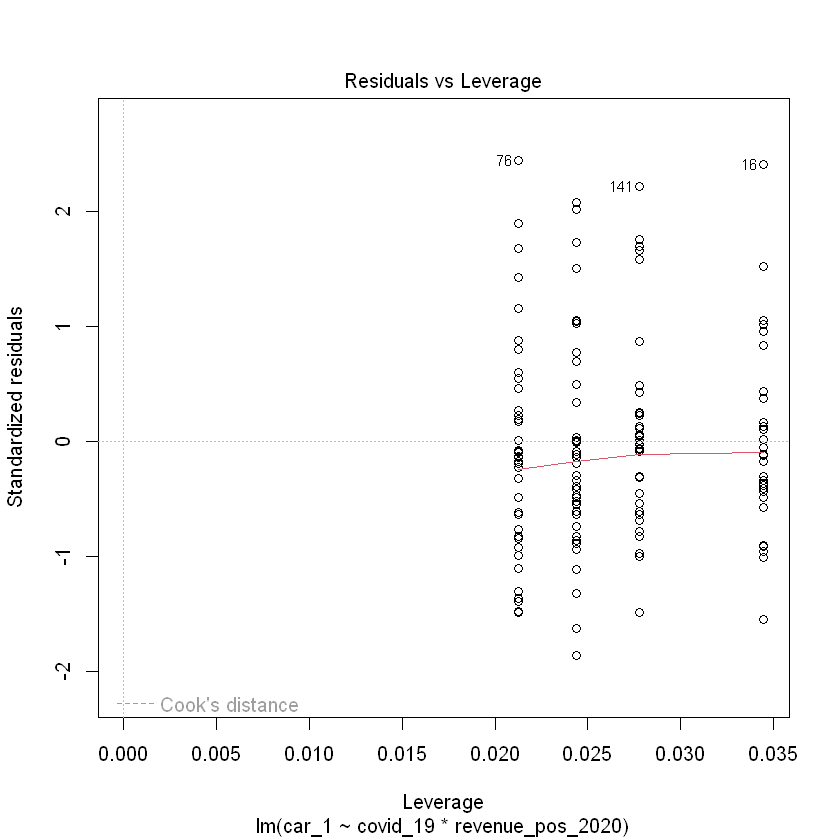

In [196]:
plot(mod4_CAR1)

At a 90% level of siginificance, the relationship/interaction between car 1 and Covid is not significant. The other interactions are also considered not to be significant. However, Revenue and CAR1 seem to have a more significant relationship than the Covid and the Interaction between Revenue and Covid on CAR1.l Taking the p-value of the model at a 90% level of significance, the relationship  between car1, revenue and COVID 19 is not significant, we reject  the null hypothesis.

In [170]:
mod4_CAR2 <- lm(car_2 ~ covid_19 * revenue_pos_2020, data = data)
summary(mod4_CAR2)


Call:
lm(formula = car_2 ~ covid_19 * revenue_pos_2020, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.21209 -0.06519 -0.00269  0.04705  0.28045 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)  
(Intercept)                -0.017110   0.019280  -0.887   0.3763  
covid_191                   0.005264   0.025907   0.203   0.8393  
revenue_pos_2020            0.058621   0.025192   2.327   0.0213 *
covid_191:revenue_pos_2020 -0.041582   0.034109  -1.219   0.2247  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1038 on 149 degrees of freedom
Multiple R-squared:  0.04666,	Adjusted R-squared:  0.02747 
F-statistic: 2.431 on 3 and 149 DF,  p-value: 0.06746


In [171]:
kable(extractCoefs(mod4_CAR2))



|Dependent |Coefficient                | Estimate| Std_error| T_value| P_value|
|:---------|:--------------------------|--------:|---------:|-------:|-------:|
|car_2     |COVID190                   |   -0.017|     0.019|  -0.887|   0.376|
|car_2     |covid_191                  |    0.005|     0.026|   0.203|   0.839|
|car_2     |revenue_pos_2020           |    0.059|     0.025|   2.327|   0.021|
|car_2     |covid_191:revenue_pos_2020 |   -0.042|     0.034|  -1.219|   0.225|

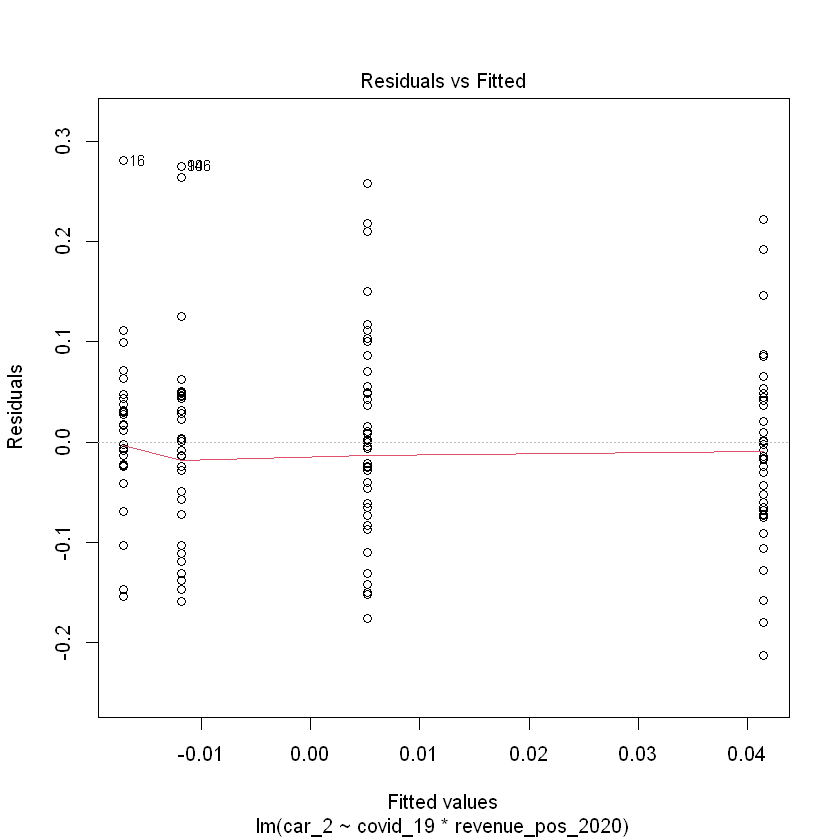

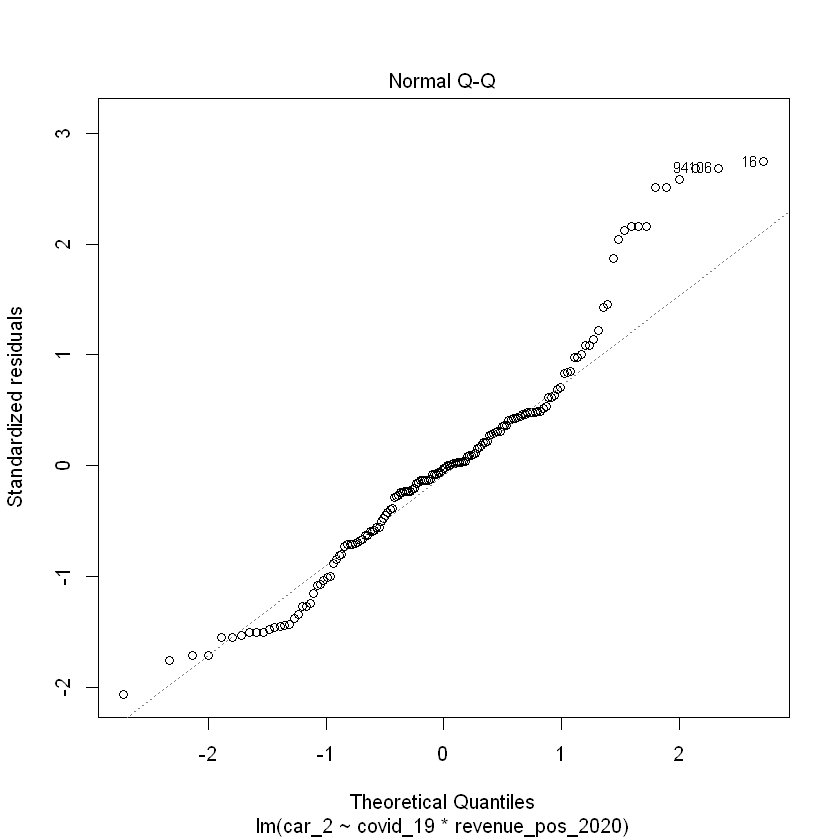

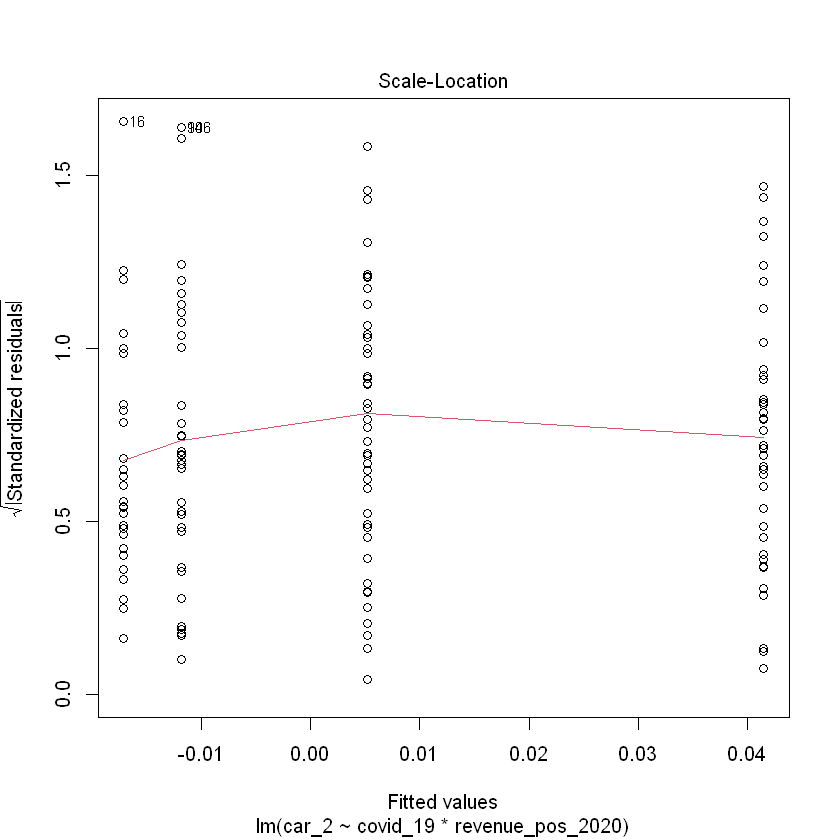

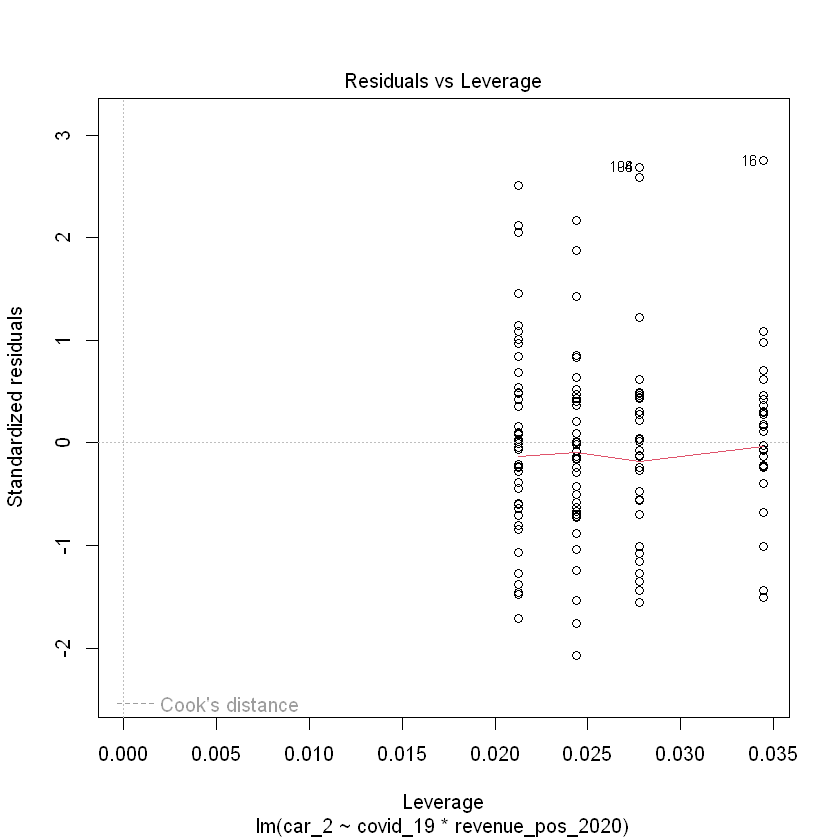

In [197]:
plot(mod4_CAR2)

At a 90% level of siginificance, the relationship/interaction between car2 and revenue statistically significant. The other interactions are not considered to be statistically significant. Taking the p-value of the model at a 90% level of significance, the relationship  between car2 and the predictors is statistically significant. Examining the F-value, suggests that the null hypothesis: That the car2 and covid19, p_e_dummy have a significant relationship is True. 

In [172]:
mod5_CAR1 <- lm(car_1 ~ covid_19 * p_e_dummy, data = data)
summary(mod5_CAR1)


Call:
lm(formula = car_1 ~ covid_19 * p_e_dummy, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.134367 -0.042605 -0.006407  0.026781  0.180713 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)
(Intercept)           0.007331   0.013542   0.541    0.589
covid_191            -0.007824   0.017731  -0.441    0.660
p_e_dummy1            0.027675   0.017030   1.625    0.106
covid_191:p_e_dummy1 -0.023480   0.023417  -1.003    0.318

Residual standard error: 0.06771 on 135 degrees of freedom
  (14 observations deleted due to missingness)
Multiple R-squared:  0.04786,	Adjusted R-squared:  0.0267 
F-statistic: 2.262 on 3 and 135 DF,  p-value: 0.0841


In [173]:
kable(extractCoefs(mod5_CAR1))



|Dependent |Coefficient          | Estimate| Std_error| T_value| P_value|
|:---------|:--------------------|--------:|---------:|-------:|-------:|
|car_1     |COVID190             |    0.007|     0.014|   0.541|   0.589|
|car_1     |covid_191            |   -0.008|     0.018|  -0.441|   0.660|
|car_1     |p_e_dummy1           |    0.028|     0.017|   1.625|   0.106|
|car_1     |covid_191:p_e_dummy1 |   -0.023|     0.023|  -1.003|   0.318|

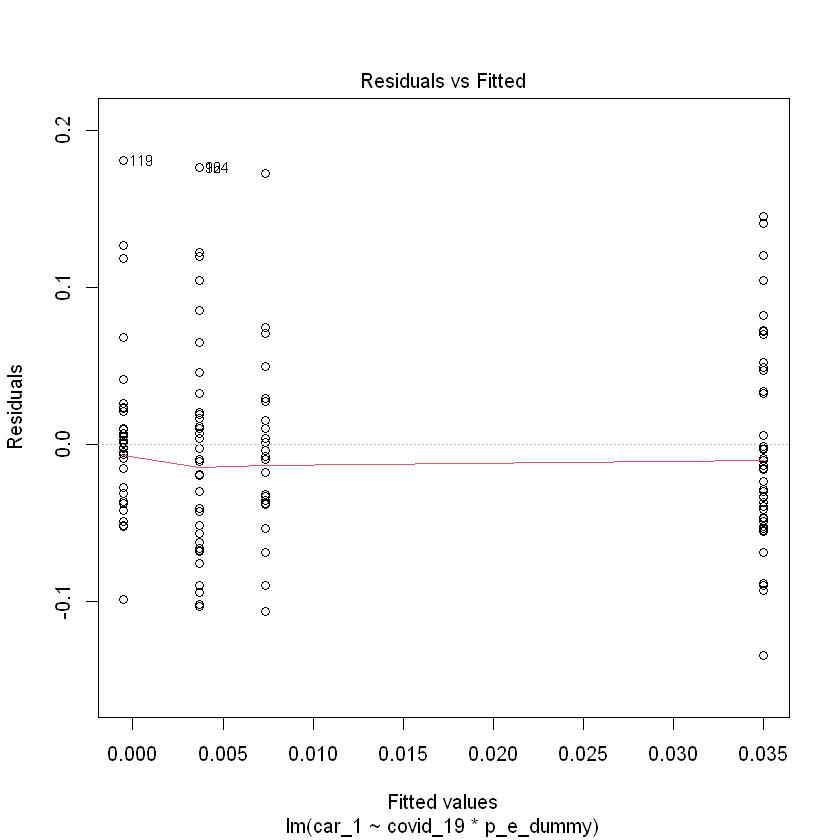

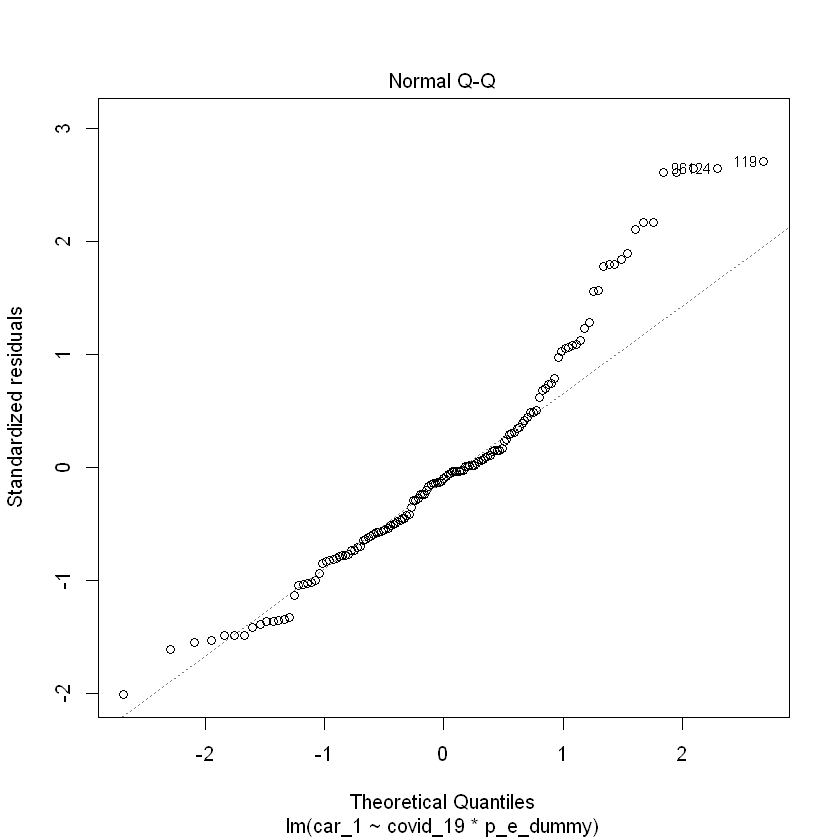

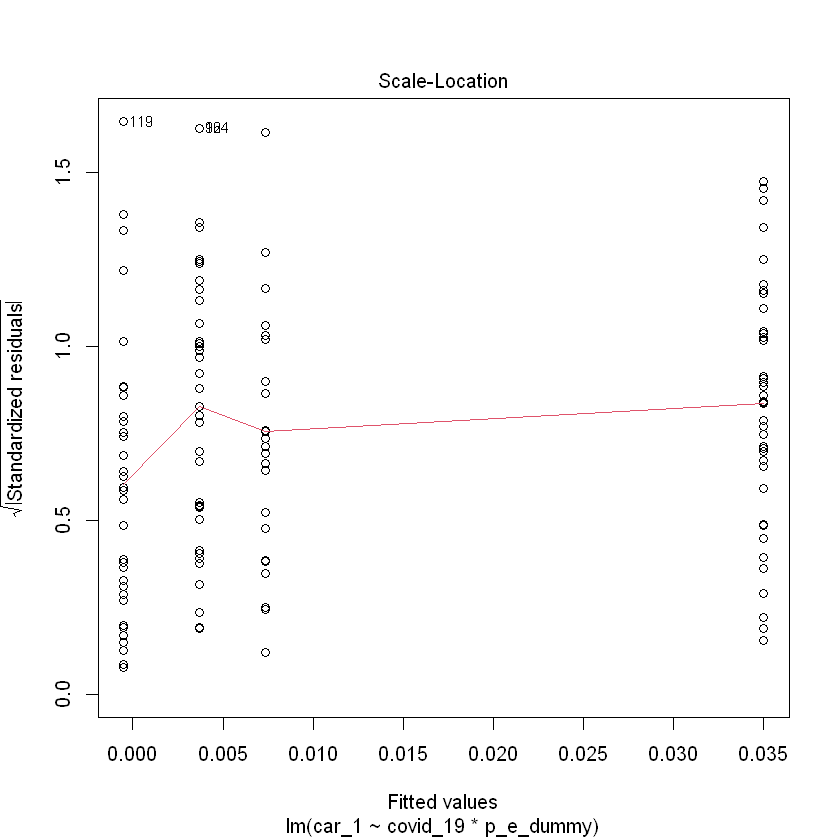

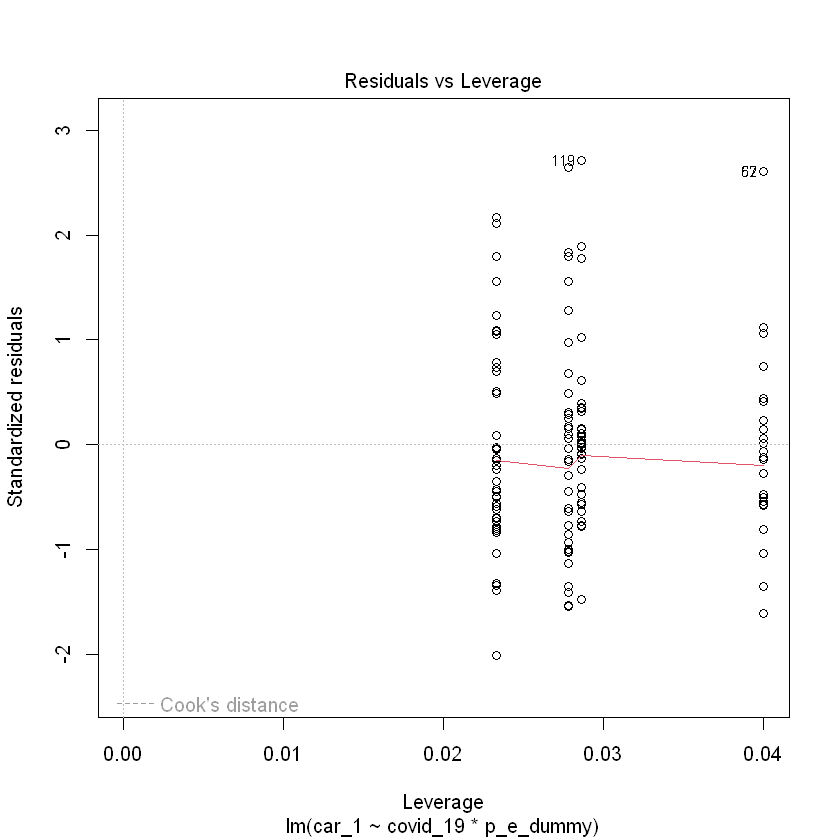

In [198]:
plot(mod5_CAR1)

At a 90% level of siginificance, the relationship/interaction between car 1 and Covid is not statistically significant. The other interactions are also considered not to be significant. Taking the p-value of the model at a 90% level of significance, the relationship  between car1, p_e_dummy and COVID 19 is statistically significant. Examining the F-value, suggests that the null hypothesis: That the car 1 and covid19, p_e_dummy have a significant relationship is True. 

In [174]:
mod5_CAR2 <- lm(car_2 ~ covid_19 * p_e_dummy, data = data)
summary(mod5_CAR2)


Call:
lm(formula = car_2 ~ covid_19 * p_e_dummy, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.196022 -0.057848 -0.004354  0.044227  0.269517 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)
(Intercept)           0.01223    0.02033   0.601    0.549
covid_191            -0.01841    0.02662  -0.691    0.491
p_e_dummy1            0.01321    0.02557   0.517    0.606
covid_191:p_e_dummy1 -0.01058    0.03516  -0.301    0.764

Residual standard error: 0.1017 on 135 degrees of freedom
  (14 observations deleted due to missingness)
Multiple R-squared:  0.01783,	Adjusted R-squared:  -0.003992 
F-statistic: 0.8171 on 3 and 135 DF,  p-value: 0.4866


In [175]:
kable(extractCoefs(mod5_CAR2))



|Dependent |Coefficient          | Estimate| Std_error| T_value| P_value|
|:---------|:--------------------|--------:|---------:|-------:|-------:|
|car_2     |COVID190             |    0.012|     0.020|   0.601|   0.549|
|car_2     |covid_191            |   -0.018|     0.027|  -0.691|   0.491|
|car_2     |p_e_dummy1           |    0.013|     0.026|   0.517|   0.606|
|car_2     |covid_191:p_e_dummy1 |   -0.011|     0.035|  -0.301|   0.764|

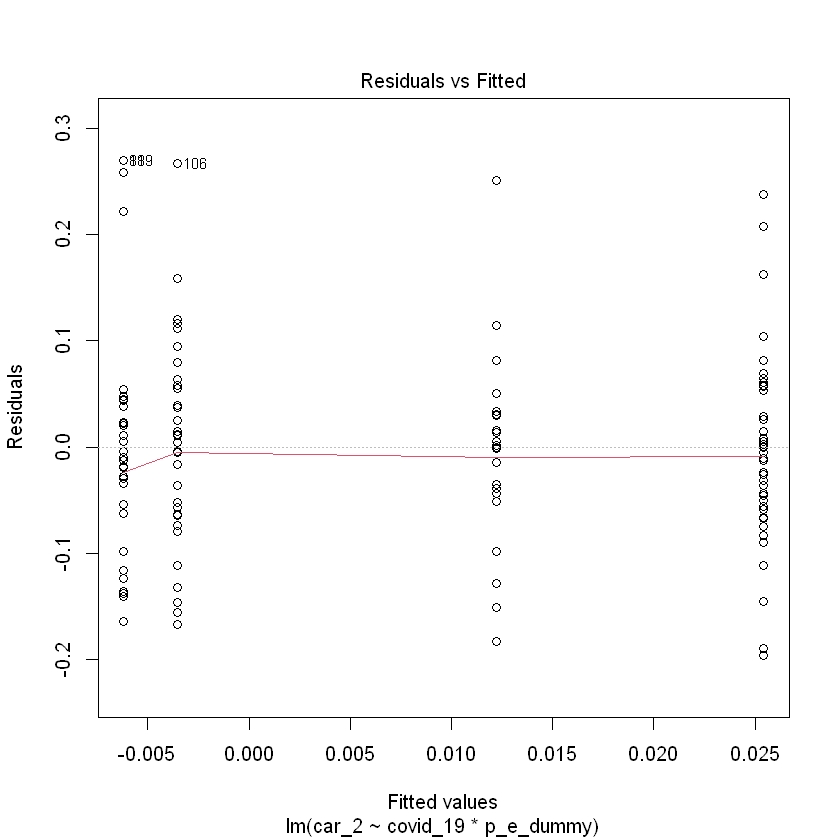

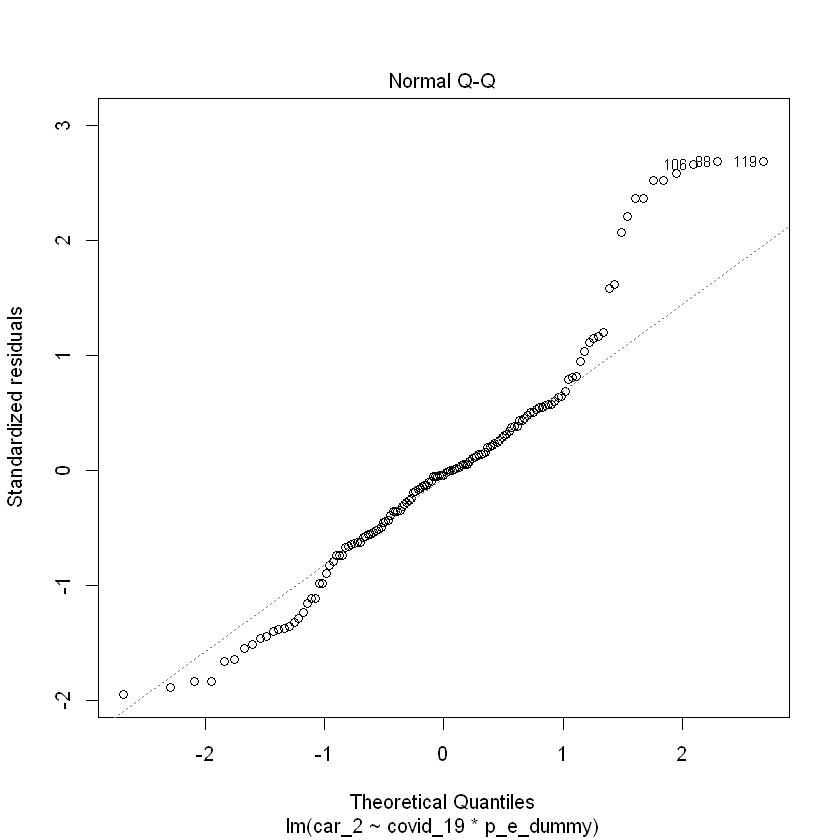

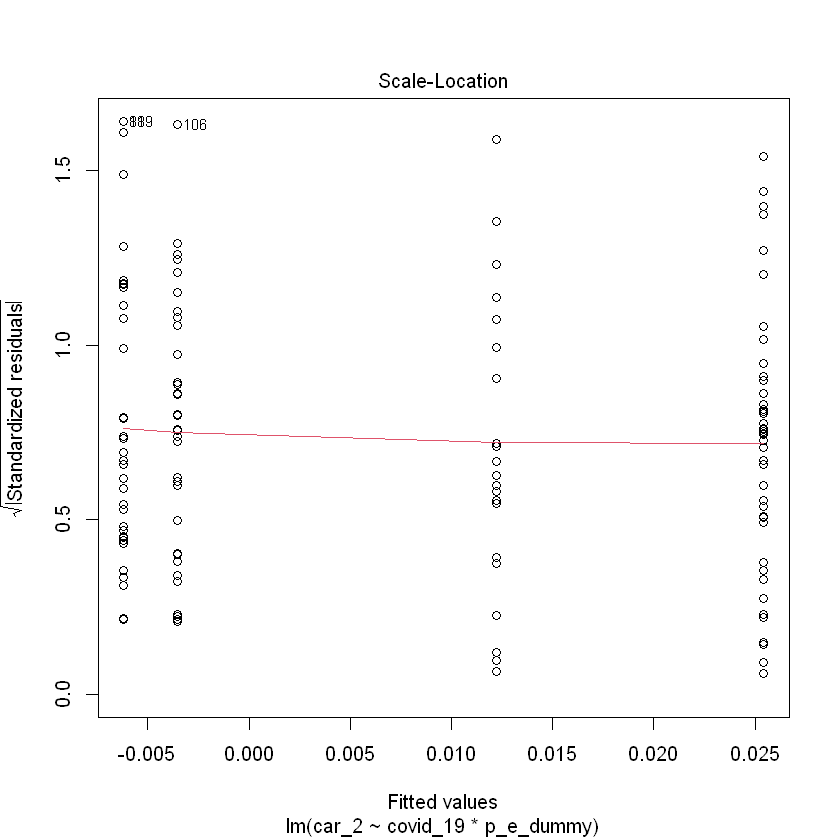

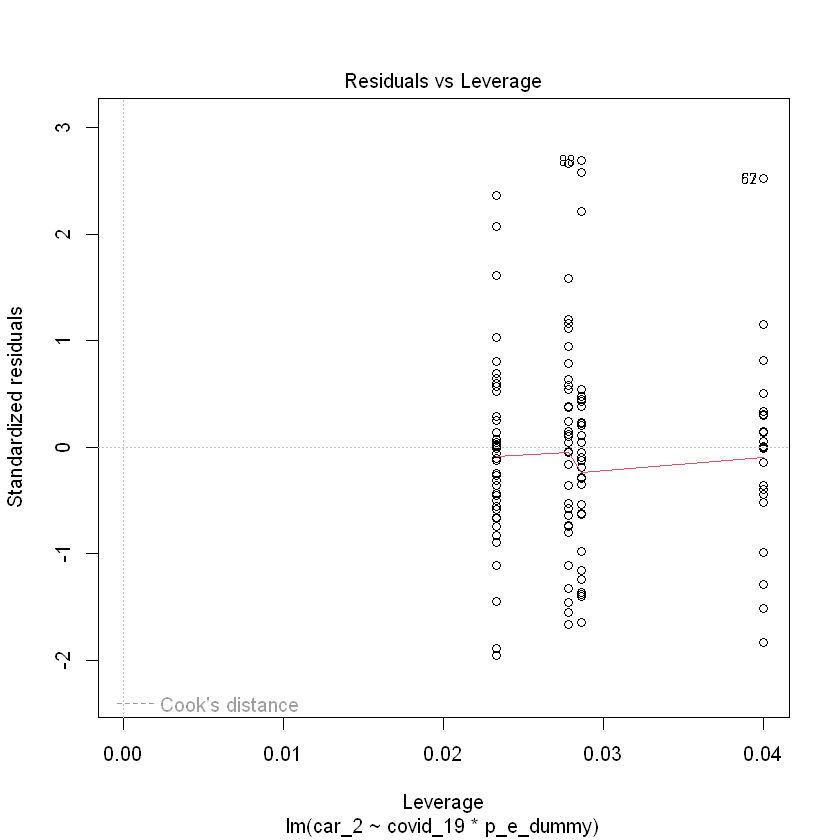

In [199]:
plot(mod5_CAR2)

At a 90% level of siginificance, the relationship/interaction between car2 and the predictors is not statistically significant. Examining the p-value of the model at a 90% level of significance, the relationship  between car1 and the predictors is not statistically significant. Examining the F-value, it is less than 1,suggests that the null hypothesis: That the car 1 and the predictors have a significant relationship is False. 

PE dummy 1 have a marginally significant effect on CAR1, but no interaction with COVID is detected. When included, the relationship between CAR1 and COVID disappears. 

Revenue pos 2020 have a significant positive effect on CAR2 (p < 0.05).

Note, however, that when relatively small sample sizes it is not recommended to estimate a relatively high number of parameters, so it would be better tbo test for simple effects with the given datsaet.

## Hypothesis 4

**The financial strength together with the size has a positive impact on the cumulative abnormal return (CAR = dependent variable) during COVID-19.**


In [177]:
mod6_CAR1 <- lm(car_1 ~ covid_19 * size_revenue * ebitda_pos_2020, data = data)
summary(mod6_CAR1)


Call:
lm(formula = car_1 ~ covid_19 * size_revenue * ebitda_pos_2020, 
    data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.132199 -0.047805 -0.008906  0.033231  0.174154 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                             3.464e-02  1.214e-02   2.853  0.00497
covid_191                              -2.843e-02  1.733e-02  -1.641  0.10307
size_revenue                           -2.239e-07  1.758e-07  -1.274  0.20478
ebitda_pos_2020                        -1.799e-02  1.987e-02  -0.905  0.36680
covid_191:size_revenue                 -4.782e-09  2.944e-07  -0.016  0.98707
covid_191:ebitda_pos_2020               2.128e-02  2.623e-02   0.811  0.41857
size_revenue:ebitda_pos_2020            1.135e-07  4.131e-07   0.275  0.78394
covid_191:size_revenue:ebitda_pos_2020  1.843e-07  9.495e-07   0.194  0.84633
                                         
(Intercept)                           

In [178]:
kable(extractCoefs(mod6_CAR1))



|Dependent |Coefficient                            | Estimate| Std_error| T_value| P_value|
|:---------|:--------------------------------------|--------:|---------:|-------:|-------:|
|car_1     |COVID190                               |    0.035|     0.012|   2.853|   0.005|
|car_1     |covid_191                              |   -0.028|     0.017|  -1.641|   0.103|
|car_1     |size_revenue                           |    0.000|     0.000|  -1.274|   0.205|
|car_1     |ebitda_pos_2020                        |   -0.018|     0.020|  -0.905|   0.367|
|car_1     |covid_191:size_revenue                 |    0.000|     0.000|  -0.016|   0.987|
|car_1     |covid_191:ebitda_pos_2020              |    0.021|     0.026|   0.811|   0.419|
|car_1     |size_revenue:ebitda_pos_2020           |    0.000|     0.000|   0.275|   0.784|
|car_1     |covid_191:size_revenue:ebitda_pos_2020 |    0.000|     0.000|   0.194|   0.846|

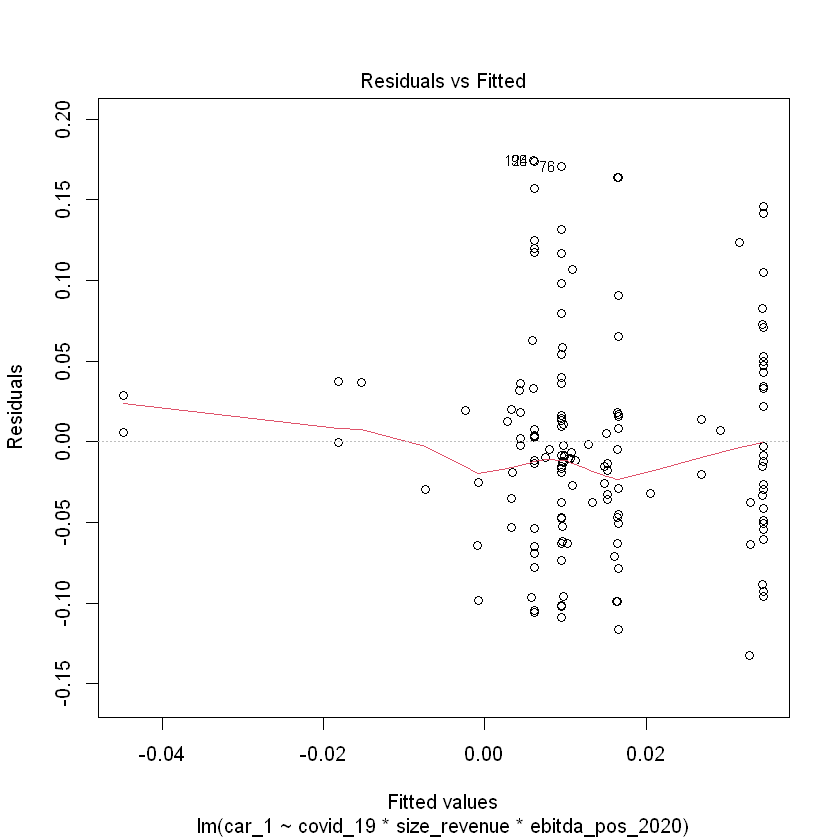

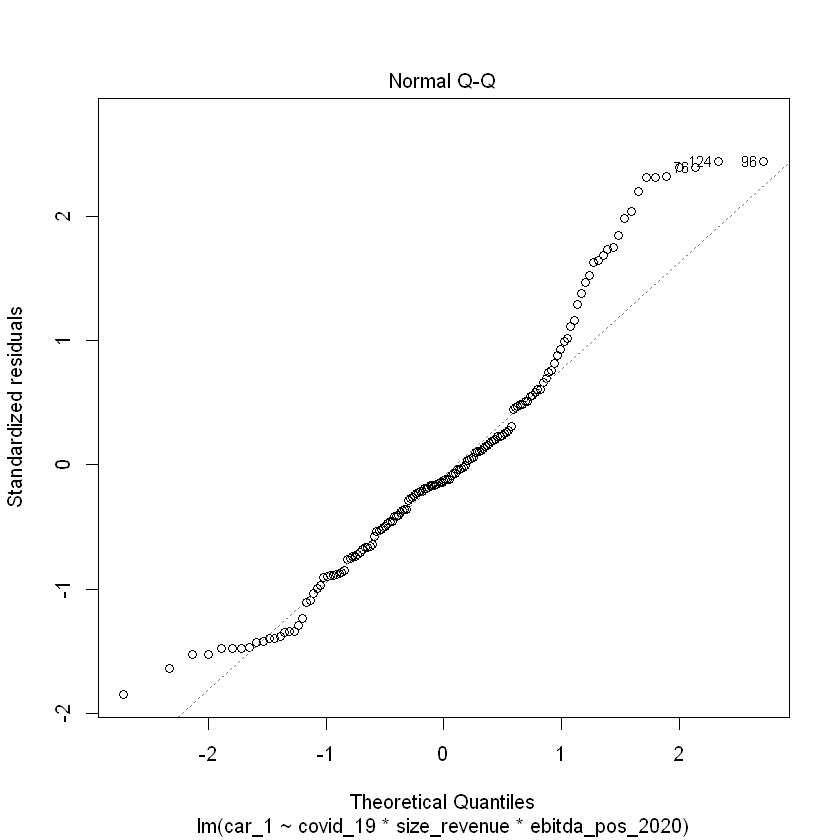

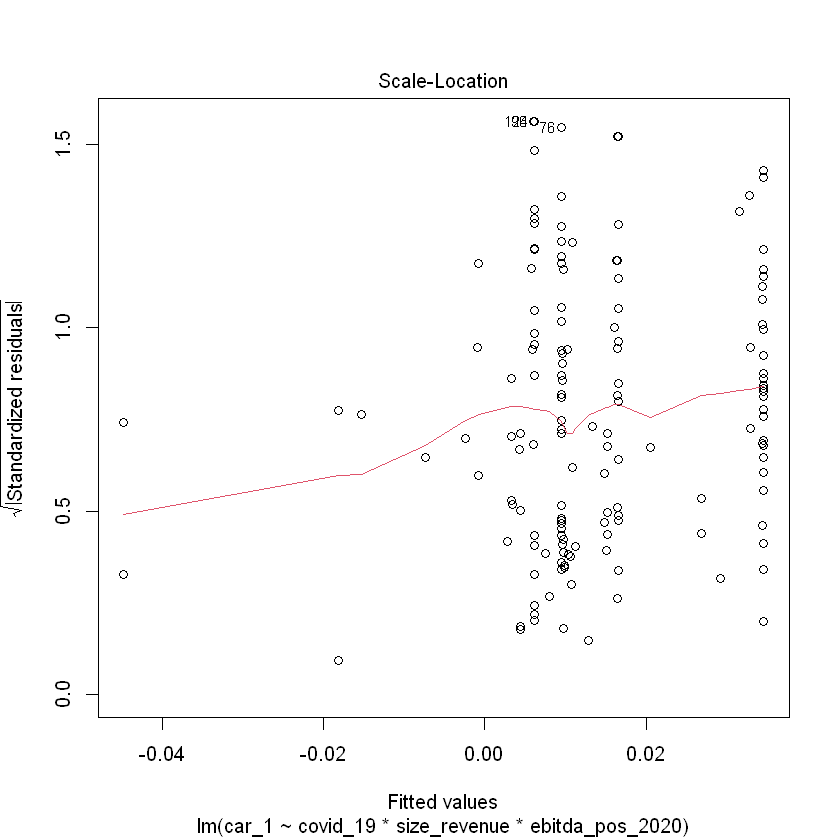

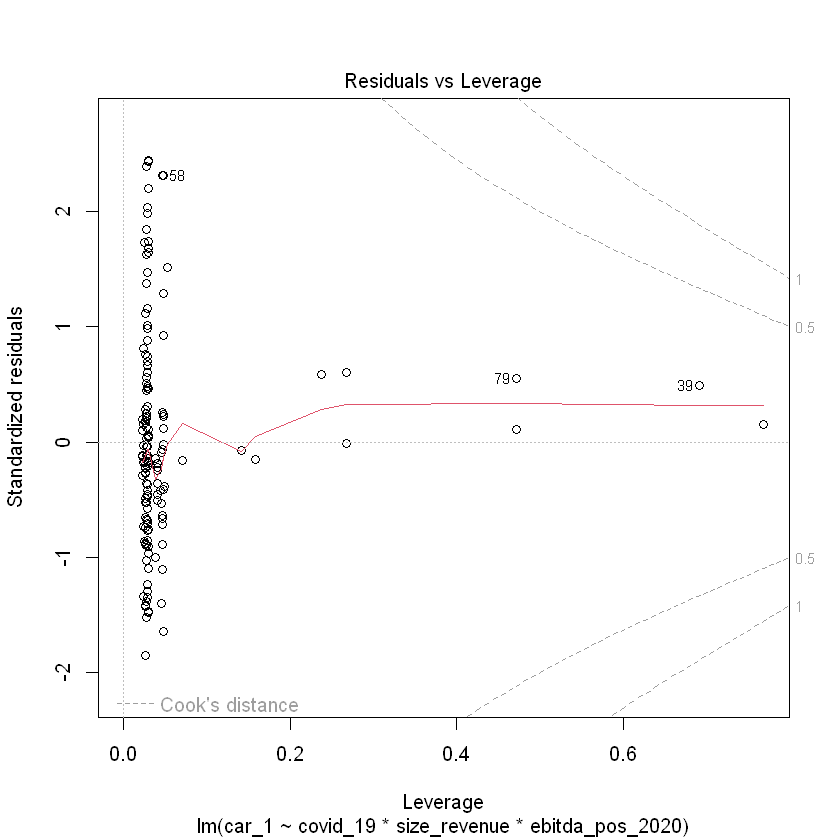

In [200]:
plot(mod6_CAR1)

In [181]:
mod6_CAR2 <- lm(car_2 ~ covid_19 * size_revenue * ebitda_pos_2020, data = data)
summary(mod6_CAR2)


Call:
lm(formula = car_2 ~ covid_19 * size_revenue * ebitda_pos_2020, 
    data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.205019 -0.062017 -0.004117  0.044366  0.274002 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                             6.092e-03  1.789e-02   0.341    0.734
covid_191                              -1.675e-02  2.553e-02  -0.656    0.513
size_revenue                            9.765e-08  2.589e-07   0.377    0.707
ebitda_pos_2020                         2.835e-02  2.927e-02   0.969    0.334
covid_191:size_revenue                 -2.086e-07  4.337e-07  -0.481    0.631
covid_191:ebitda_pos_2020              -1.178e-02  3.864e-02  -0.305    0.761
size_revenue:ebitda_pos_2020           -2.644e-07  6.086e-07  -0.434    0.665
covid_191:size_revenue:ebitda_pos_2020  5.842e-07  1.399e-06   0.418    0.677

Residual standard error: 0.1067 on 145 degrees of freedom
Multiple R-squared:  

In [182]:
kable(extractCoefs(mod6_CAR2))



|Dependent |Coefficient                            | Estimate| Std_error| T_value| P_value|
|:---------|:--------------------------------------|--------:|---------:|-------:|-------:|
|car_2     |COVID190                               |    0.006|     0.018|   0.341|   0.734|
|car_2     |covid_191                              |   -0.017|     0.026|  -0.656|   0.513|
|car_2     |size_revenue                           |    0.000|     0.000|   0.377|   0.707|
|car_2     |ebitda_pos_2020                        |    0.028|     0.029|   0.969|   0.334|
|car_2     |covid_191:size_revenue                 |    0.000|     0.000|  -0.481|   0.631|
|car_2     |covid_191:ebitda_pos_2020              |   -0.012|     0.039|  -0.305|   0.761|
|car_2     |size_revenue:ebitda_pos_2020           |    0.000|     0.000|  -0.434|   0.665|
|car_2     |covid_191:size_revenue:ebitda_pos_2020 |    0.000|     0.000|   0.418|   0.677|

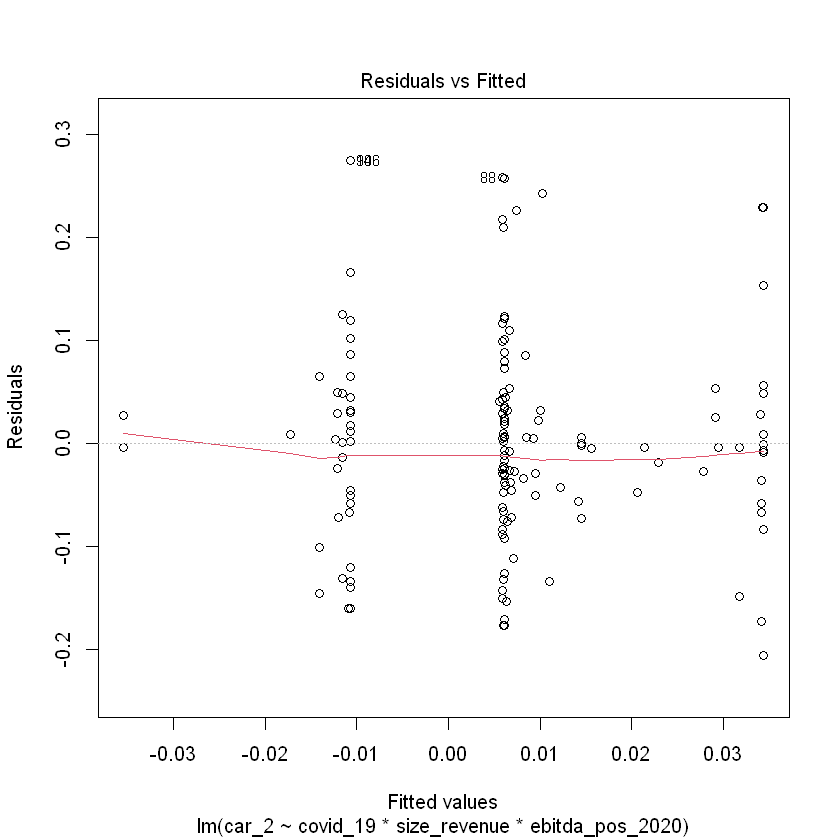

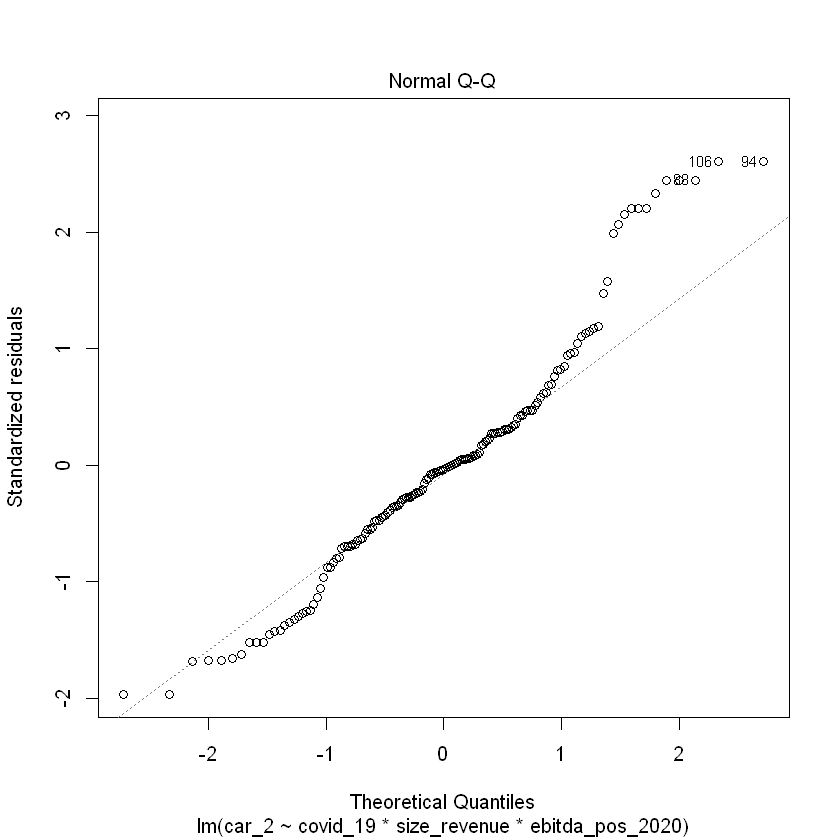

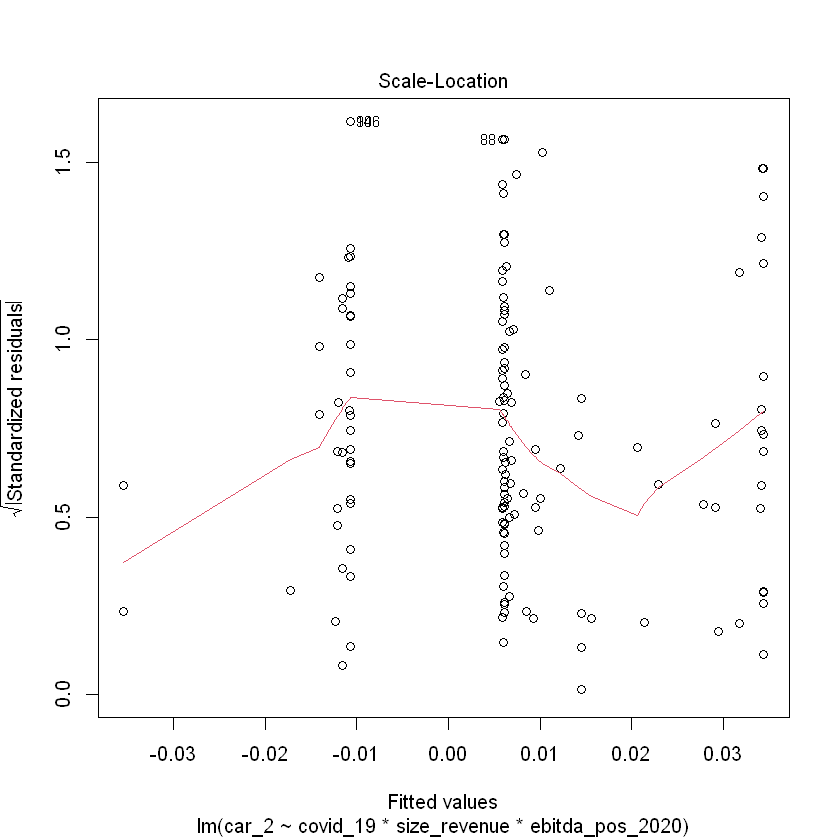

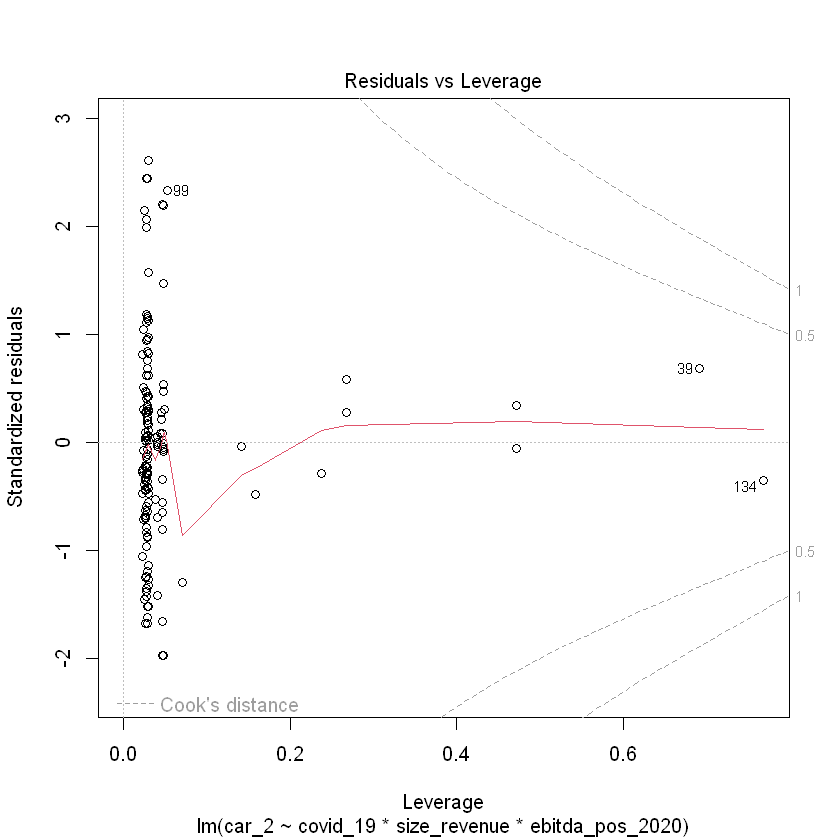

In [201]:
plot(mod6_CAR2)

In [183]:
mod7_CAR1 <- lm(car_1 ~ covid_19 * size_revenue * revenue_pos_2020, data = data)
summary(mod7_CAR1)


Call:
lm(formula = car_1 ~ covid_19 * size_revenue * revenue_pos_2020, 
    data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.130625 -0.044811 -0.007475  0.029231  0.173720 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                              1.443e-02  1.674e-02   0.862    0.390
covid_191                               -3.077e-03  2.129e-02  -0.144    0.885
size_revenue                            -8.565e-08  1.821e-07  -0.470    0.639
revenue_pos_2020                         2.113e-02  2.056e-02   1.028    0.306
covid_191:size_revenue                  -1.628e-07  3.011e-07  -0.541    0.589
covid_191:revenue_pos_2020              -2.597e-02  2.677e-02  -0.970    0.333
size_revenue:revenue_pos_2020           -4.497e-07  6.746e-07  -0.667    0.506
covid_191:size_revenue:revenue_pos_2020  6.777e-07  1.122e-06   0.604    0.547

Residual standard error: 0.07235 on 145 degrees of freedom
Multiple R

In [184]:
kable(extractCoefs(mod7_CAR1))



|Dependent |Coefficient                             | Estimate| Std_error| T_value| P_value|
|:---------|:---------------------------------------|--------:|---------:|-------:|-------:|
|car_1     |COVID190                                |    0.014|     0.017|   0.862|   0.390|
|car_1     |covid_191                               |   -0.003|     0.021|  -0.144|   0.885|
|car_1     |size_revenue                            |    0.000|     0.000|  -0.470|   0.639|
|car_1     |revenue_pos_2020                        |    0.021|     0.021|   1.028|   0.306|
|car_1     |covid_191:size_revenue                  |    0.000|     0.000|  -0.541|   0.589|
|car_1     |covid_191:revenue_pos_2020              |   -0.026|     0.027|  -0.970|   0.333|
|car_1     |size_revenue:revenue_pos_2020           |    0.000|     0.000|  -0.667|   0.506|
|car_1     |covid_191:size_revenue:revenue_pos_2020 |    0.000|     0.000|   0.604|   0.547|

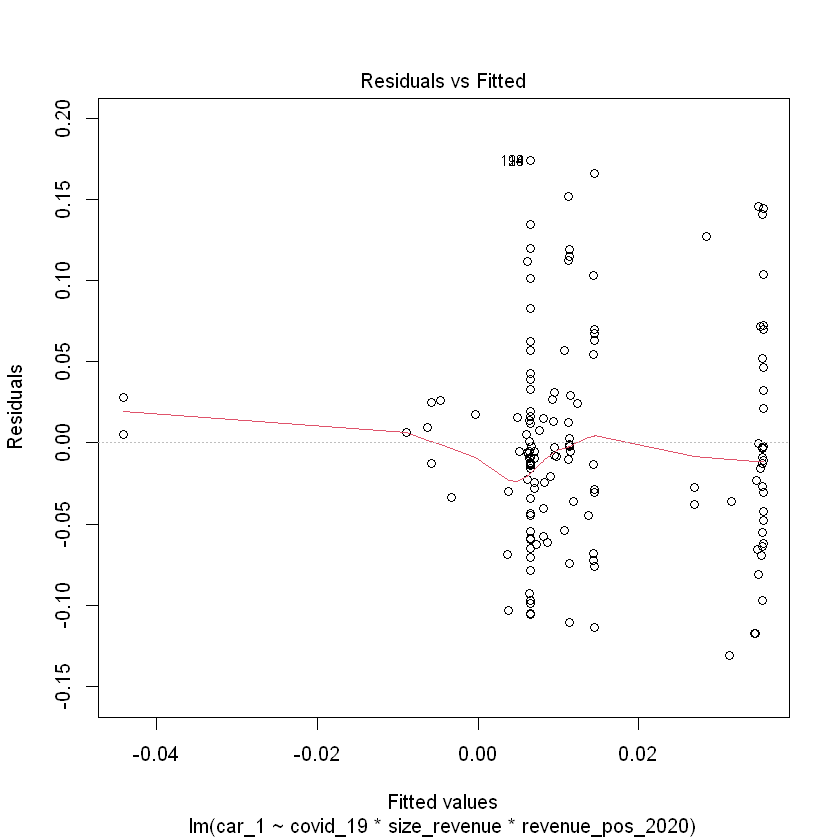

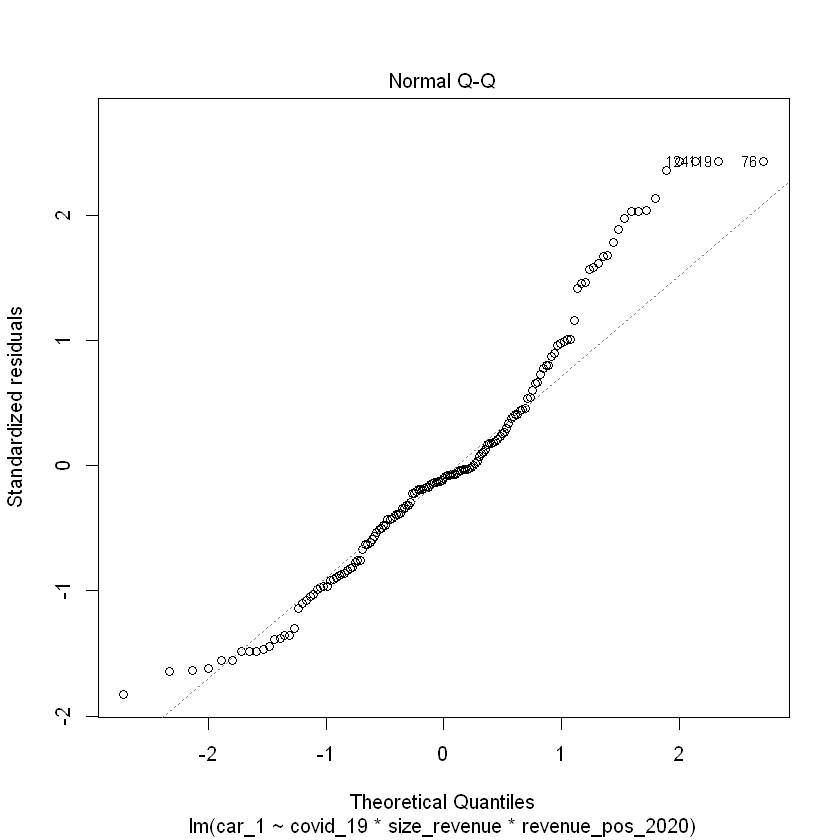

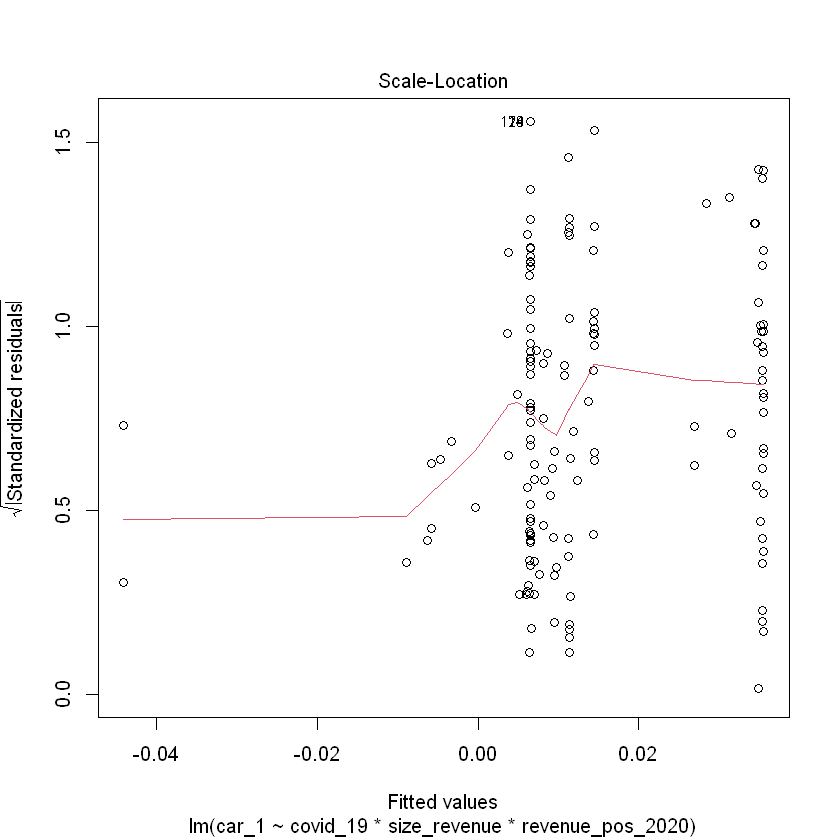

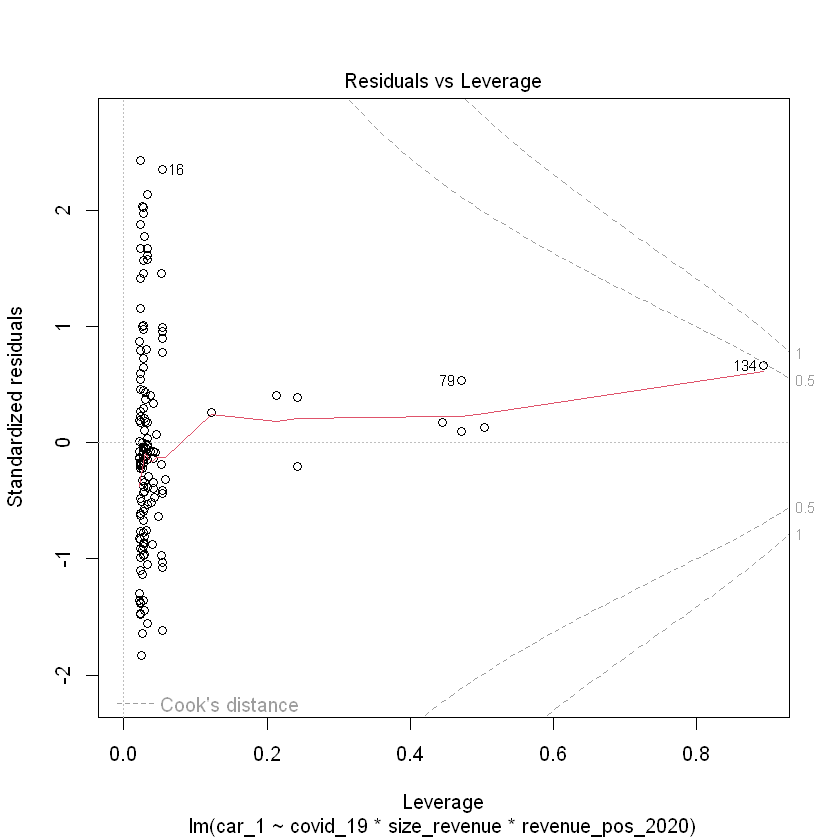

In [202]:
plot(mod7_CAR1)

In [185]:
mod7_CAR2 <- lm(car_2 ~ covid_19 * size_revenue * revenue_pos_2020, data = data)
summary(mod7_CAR2)


Call:
lm(formula = car_2 ~ covid_19 * size_revenue * revenue_pos_2020, 
    data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.216200 -0.064149 -0.002577  0.043790  0.302312 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                             -3.901e-02  2.411e-02  -1.618  0.10784
covid_191                                2.892e-02  3.065e-02   0.943  0.34701
size_revenue                             3.990e-07  2.622e-07   1.522  0.13022
revenue_pos_2020                         8.497e-02  2.960e-02   2.871  0.00471
covid_191:size_revenue                  -4.795e-07  4.334e-07  -1.106  0.27042
covid_191:revenue_pos_2020              -6.958e-02  3.853e-02  -1.806  0.07302
size_revenue:revenue_pos_2020           -1.156e-06  9.712e-07  -1.190  0.23601
covid_191:size_revenue:revenue_pos_2020  1.206e-06  1.616e-06   0.746  0.45668
                                          
(Intercept)                

In [186]:
kable(extractCoefs(mod7_CAR2))



|Dependent |Coefficient                             | Estimate| Std_error| T_value| P_value|
|:---------|:---------------------------------------|--------:|---------:|-------:|-------:|
|car_2     |COVID190                                |   -0.039|     0.024|  -1.618|   0.108|
|car_2     |covid_191                               |    0.029|     0.031|   0.943|   0.347|
|car_2     |size_revenue                            |    0.000|     0.000|   1.522|   0.130|
|car_2     |revenue_pos_2020                        |    0.085|     0.030|   2.871|   0.005|
|car_2     |covid_191:size_revenue                  |    0.000|     0.000|  -1.106|   0.270|
|car_2     |covid_191:revenue_pos_2020              |   -0.070|     0.039|  -1.806|   0.073|
|car_2     |size_revenue:revenue_pos_2020           |    0.000|     0.000|  -1.190|   0.236|
|car_2     |covid_191:size_revenue:revenue_pos_2020 |    0.000|     0.000|   0.746|   0.457|

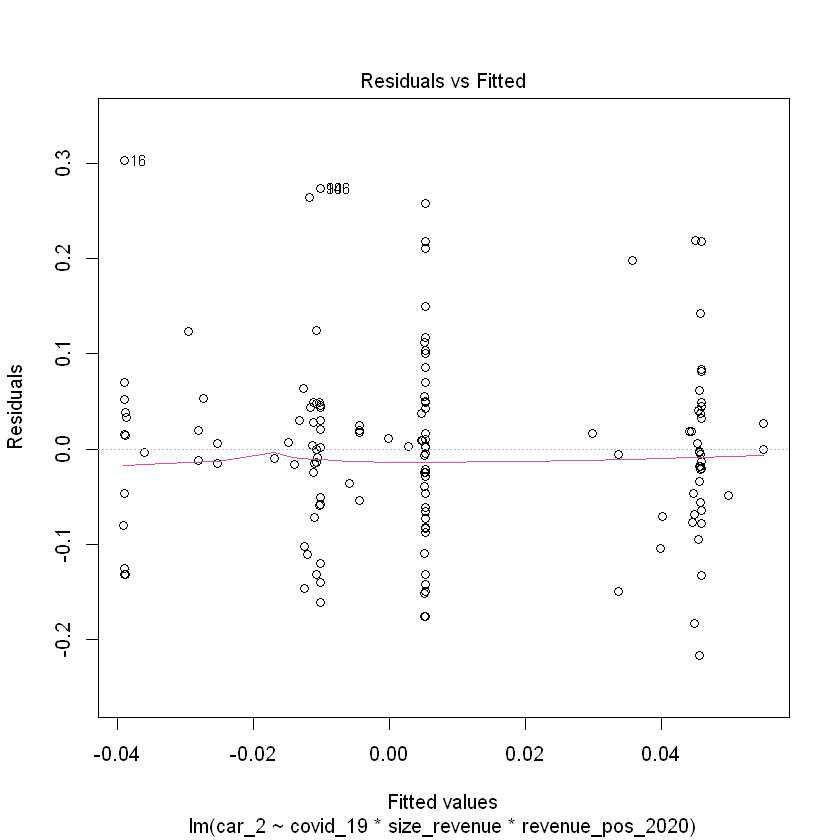

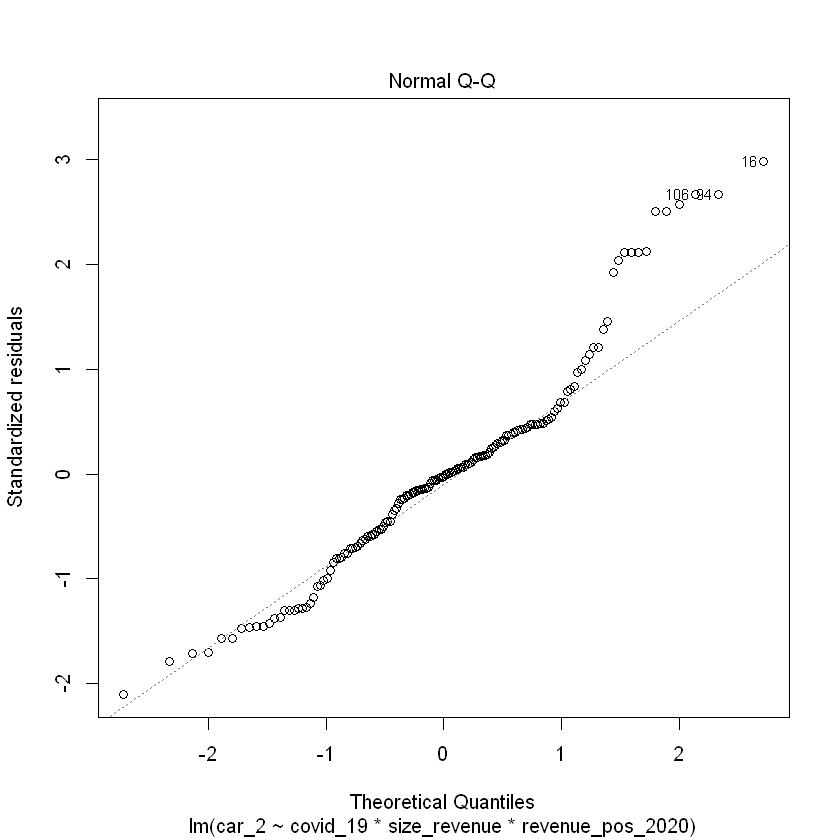

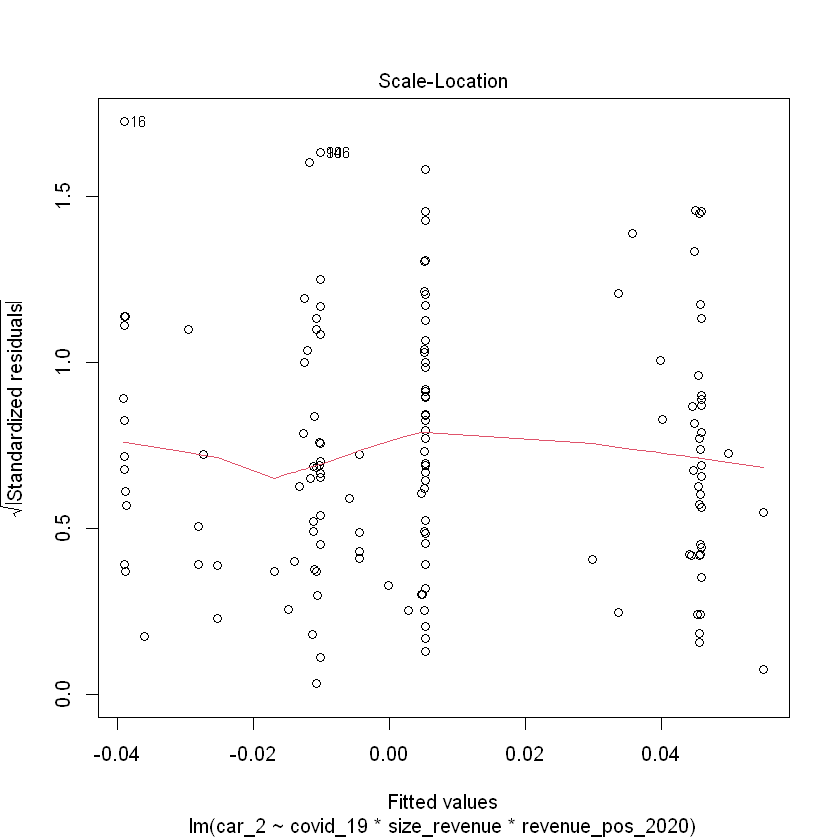

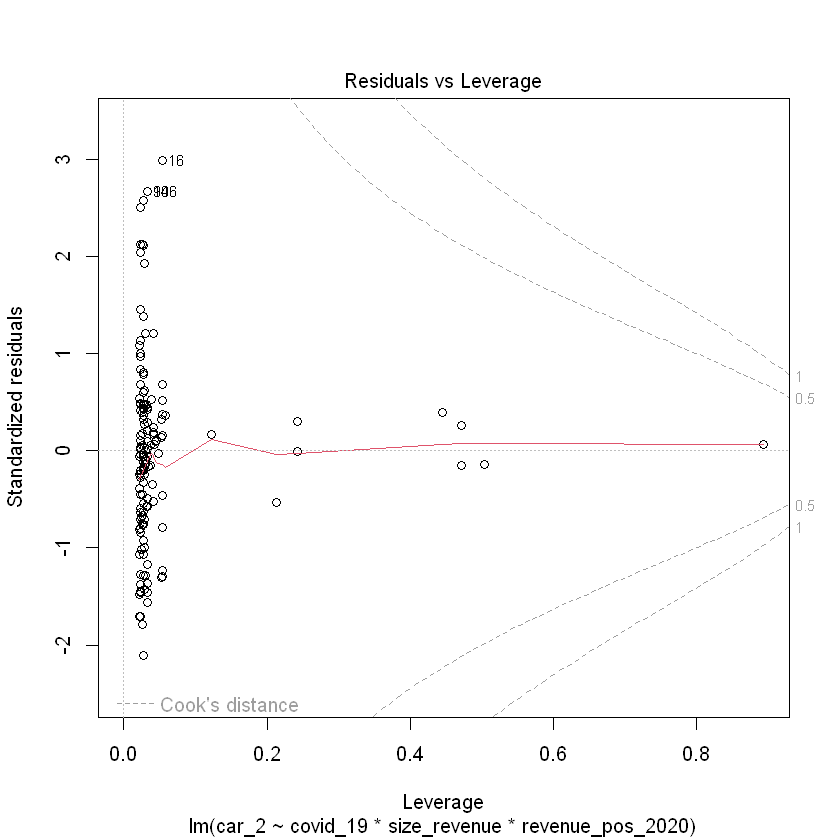

In [203]:
plot(mod7_CAR2)

In [187]:
mod8_CAR1 <- lm(car_1 ~ covid_19 * size_revenue * p_e_dummy, data = data)
summary(mod8_CAR1)


Call:
lm(formula = car_1 ~ covid_19 * size_revenue * p_e_dummy, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.140491 -0.039136 -0.005532  0.029253  0.184372 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)  
(Intercept)                        7.467e-03  1.524e-02   0.490   0.6250  
covid_191                         -1.163e-02  2.020e-02  -0.576   0.5657  
size_revenue                      -6.304e-09  3.268e-07  -0.019   0.9846  
p_e_dummy1                         3.589e-02  1.907e-02   1.882   0.0621 .
covid_191:size_revenue             4.400e-07  8.568e-07   0.513   0.6085  
covid_191:p_e_dummy1              -2.367e-02  2.613e-02  -0.906   0.3666  
size_revenue:p_e_dummy1           -2.708e-07  3.667e-07  -0.738   0.4615  
covid_191:size_revenue:p_e_dummy1 -4.019e-07  9.002e-07  -0.446   0.6560  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06765 on 131 degrees of

In [188]:
kable(extractCoefs(mod8_CAR1))



|Dependent |Coefficient                       | Estimate| Std_error| T_value| P_value|
|:---------|:---------------------------------|--------:|---------:|-------:|-------:|
|car_1     |COVID190                          |    0.007|     0.015|   0.490|   0.625|
|car_1     |covid_191                         |   -0.012|     0.020|  -0.576|   0.566|
|car_1     |size_revenue                      |    0.000|     0.000|  -0.019|   0.985|
|car_1     |p_e_dummy1                        |    0.036|     0.019|   1.882|   0.062|
|car_1     |covid_191:size_revenue            |    0.000|     0.000|   0.513|   0.608|
|car_1     |covid_191:p_e_dummy1              |   -0.024|     0.026|  -0.906|   0.367|
|car_1     |size_revenue:p_e_dummy1           |    0.000|     0.000|  -0.738|   0.462|
|car_1     |covid_191:size_revenue:p_e_dummy1 |    0.000|     0.000|  -0.446|   0.656|

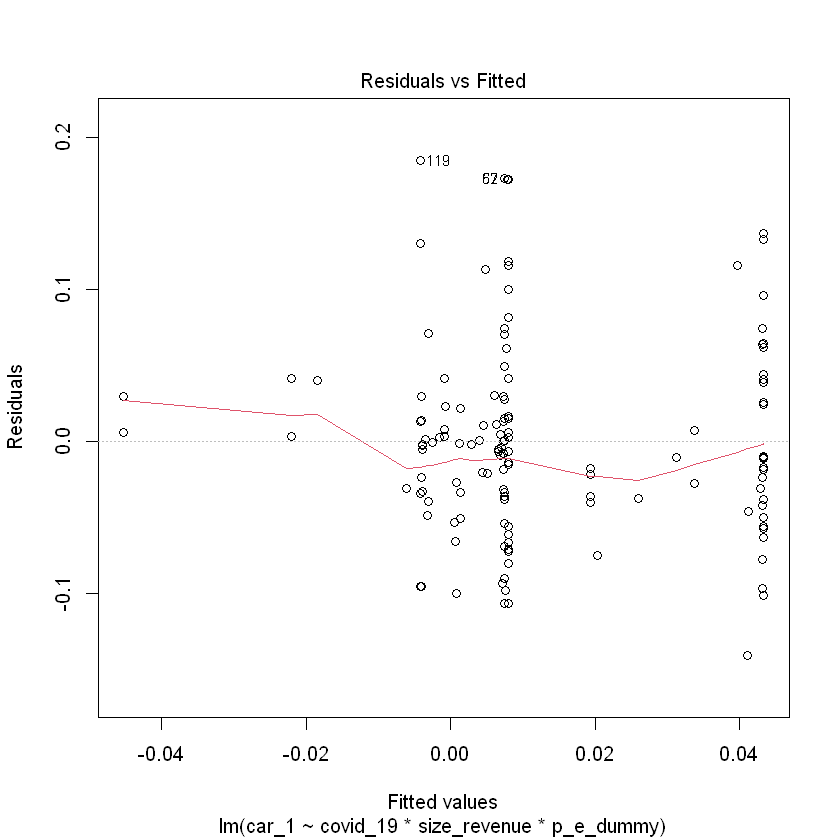

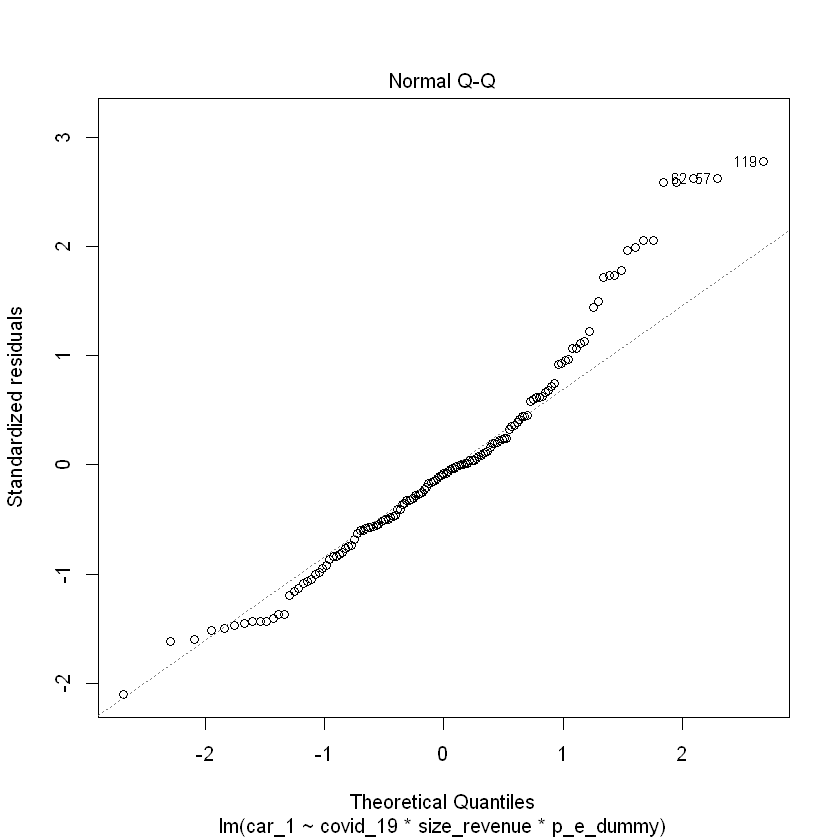

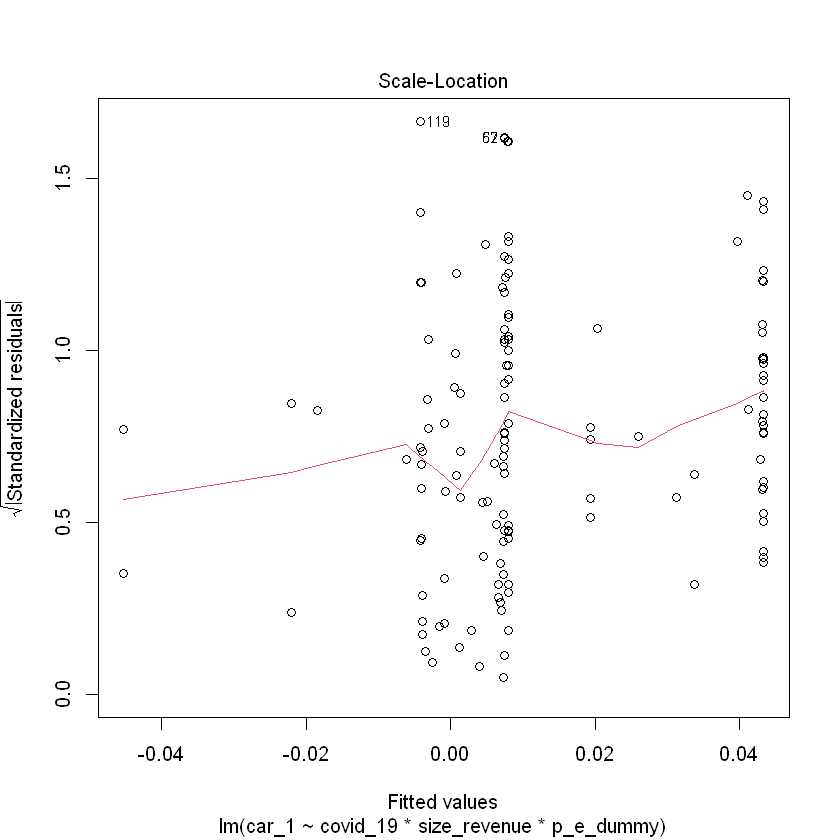

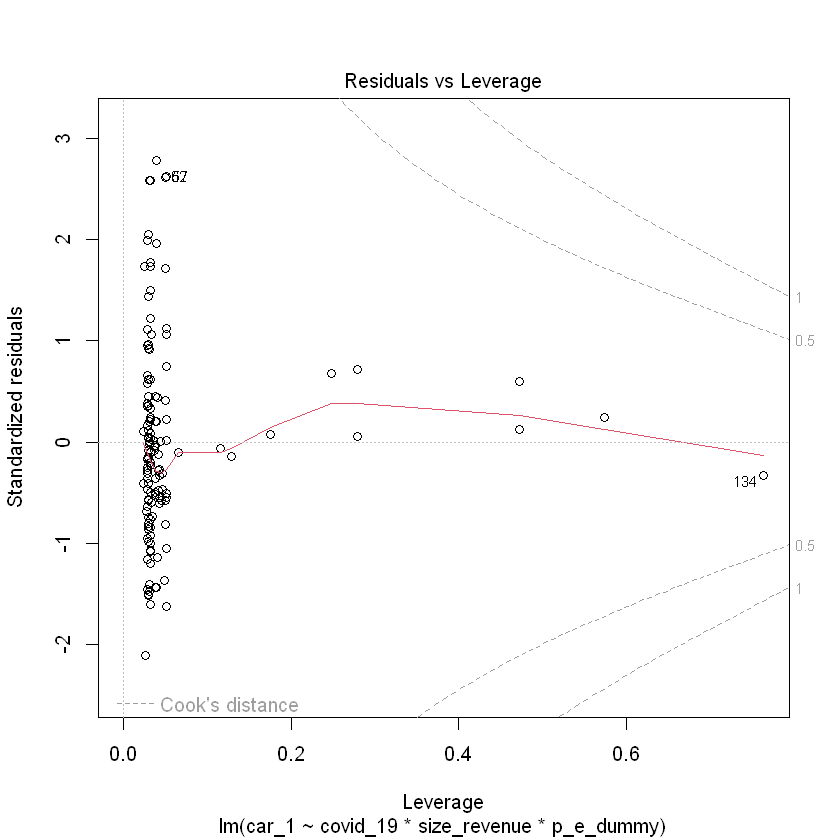

In [204]:
plot(mod8_CAR1)

In [189]:
mod8_CAR2 <- lm(car_2 ~ covid_19 * size_revenue * p_e_dummy, data = data)
summary(mod8_CAR2)


Call:
lm(formula = car_2 ~ covid_19 * size_revenue * p_e_dummy, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.197148 -0.058718 -0.001983  0.042955  0.274133 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)
(Intercept)                        1.063e-02  2.321e-02   0.458    0.648
covid_191                         -2.143e-02  3.076e-02  -0.697    0.487
size_revenue                       7.450e-08  4.977e-07   0.150    0.881
p_e_dummy1                         1.596e-02  2.905e-02   0.550    0.583
covid_191:size_revenue             4.724e-07  1.305e-06   0.362    0.718
covid_191:p_e_dummy1              -5.664e-03  3.979e-02  -0.142    0.887
size_revenue:p_e_dummy1           -1.128e-07  5.584e-07  -0.202    0.840
covid_191:size_revenue:p_e_dummy1 -6.011e-07  1.371e-06  -0.438    0.662

Residual standard error: 0.103 on 131 degrees of freedom
  (14 observations deleted due to missingness)
Multiple R-squared:  0.02156,	A

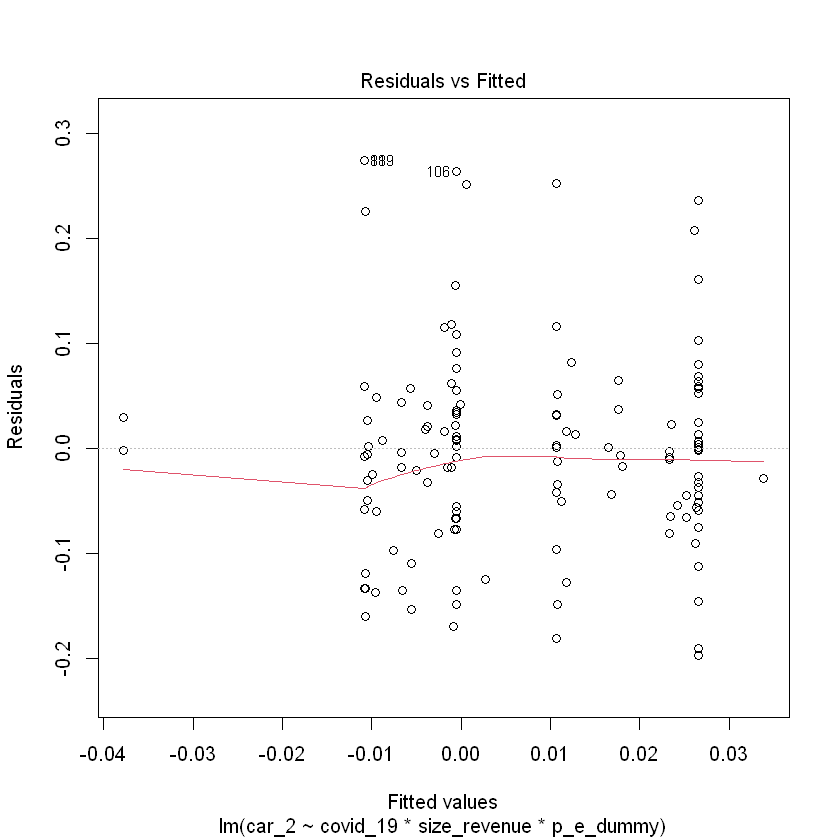

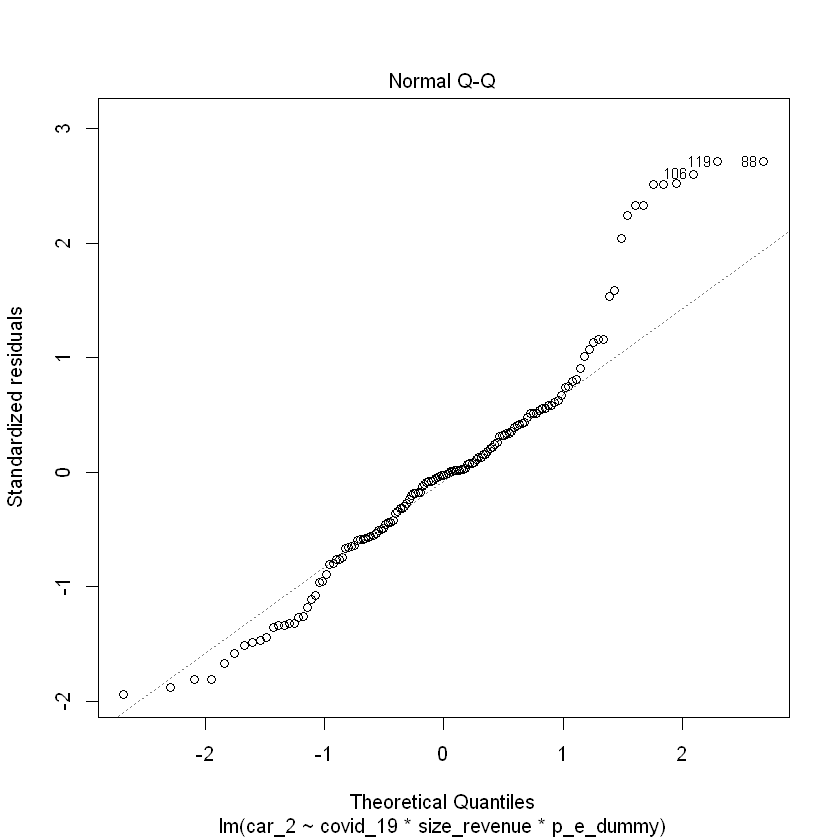

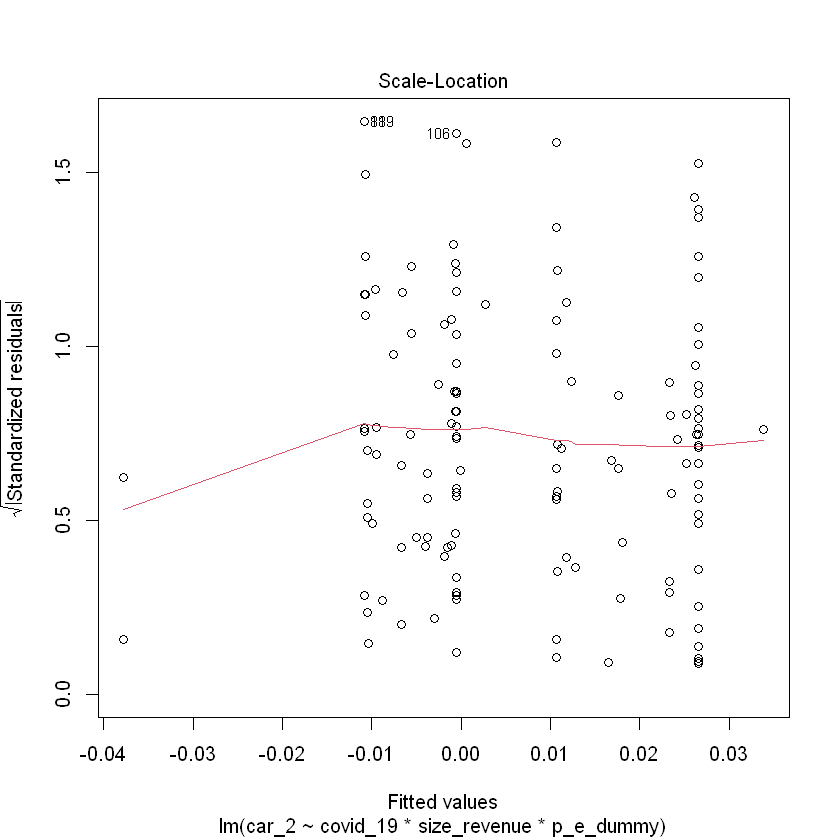

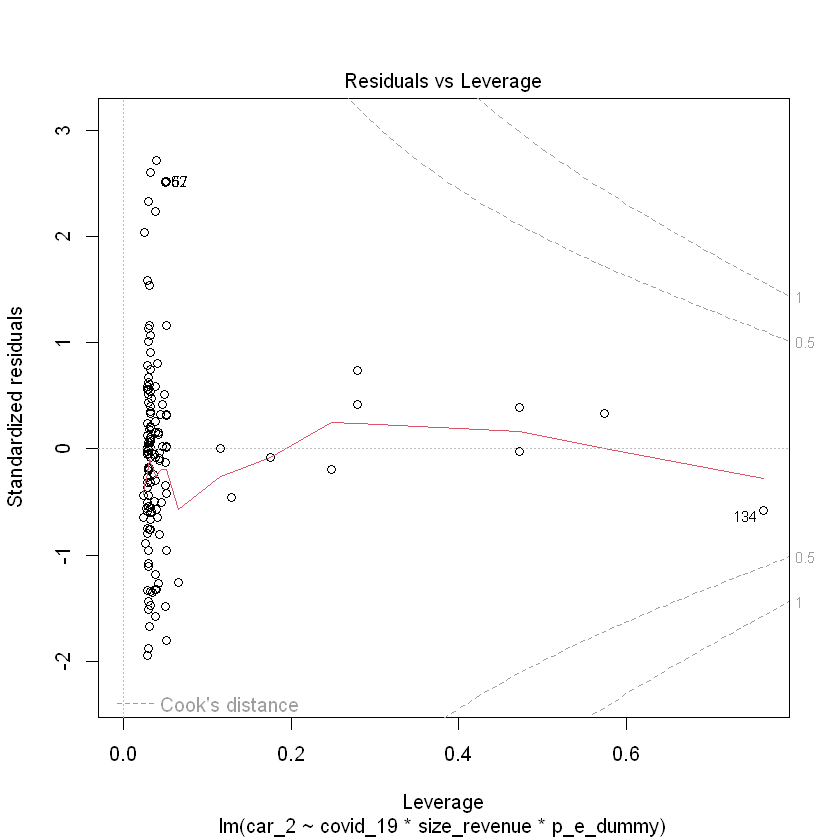

In [205]:
plot(mod8_CAR2)

## Response to hypothesis 4

Revenue pos 2020 maintain its significat small positive effect on CAR2 when accounting for other explanatory variables. Revenue pos 2020 present a small negative marginally sigificant interaction with COVID19. 
The models are also not statistically significant at a 90% level of significance. 
However, these effects on CAR are very low (see estimates).

## HYPOTHESIS 5

**Local transaction (cross-border = 0) has a positive impact on the cumulative abnormal return (CAR = dependent variable).**

In [192]:
mod9_CAR1 <- lm(car_1 ~ cross_border * covid_19, data = data)
summary(mod9_CAR1)


Call:
lm(formula = car_1 ~ cross_border * covid_19, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.138126 -0.045889 -0.007966  0.032511  0.175354 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)
(Intercept)              0.011877   0.011197   1.061    0.291
cross_border1            0.026888   0.017395   1.546    0.124
covid_191               -0.005088   0.014628  -0.348    0.728
cross_border1:covid_191 -0.028811   0.024430  -1.179    0.240

Residual standard error: 0.07169 on 149 degrees of freedom
Multiple R-squared:  0.02924,	Adjusted R-squared:  0.009699 
F-statistic: 1.496 on 3 and 149 DF,  p-value: 0.218


In [193]:
kable(extractCoefs(mod9_CAR1))



|Dependent |Coefficient             | Estimate| Std_error| T_value| P_value|
|:---------|:-----------------------|--------:|---------:|-------:|-------:|
|car_1     |COVID190                |    0.012|     0.011|   1.061|   0.291|
|car_1     |cross_border1           |    0.027|     0.017|   1.546|   0.124|
|car_1     |covid_191               |   -0.005|     0.015|  -0.348|   0.728|
|car_1     |cross_border1:covid_191 |   -0.029|     0.024|  -1.179|   0.240|

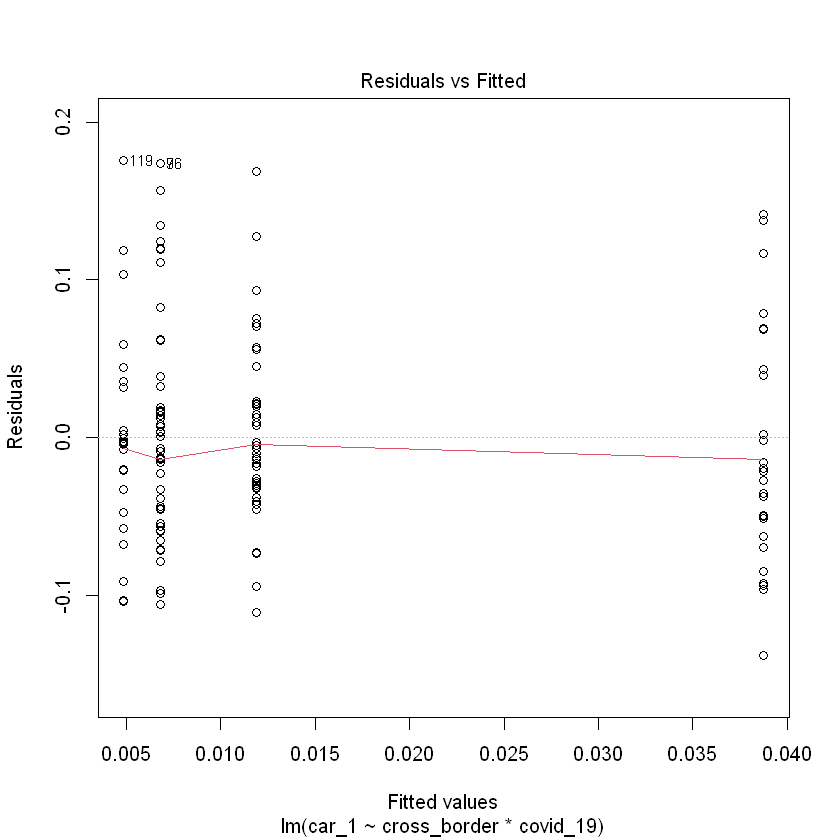

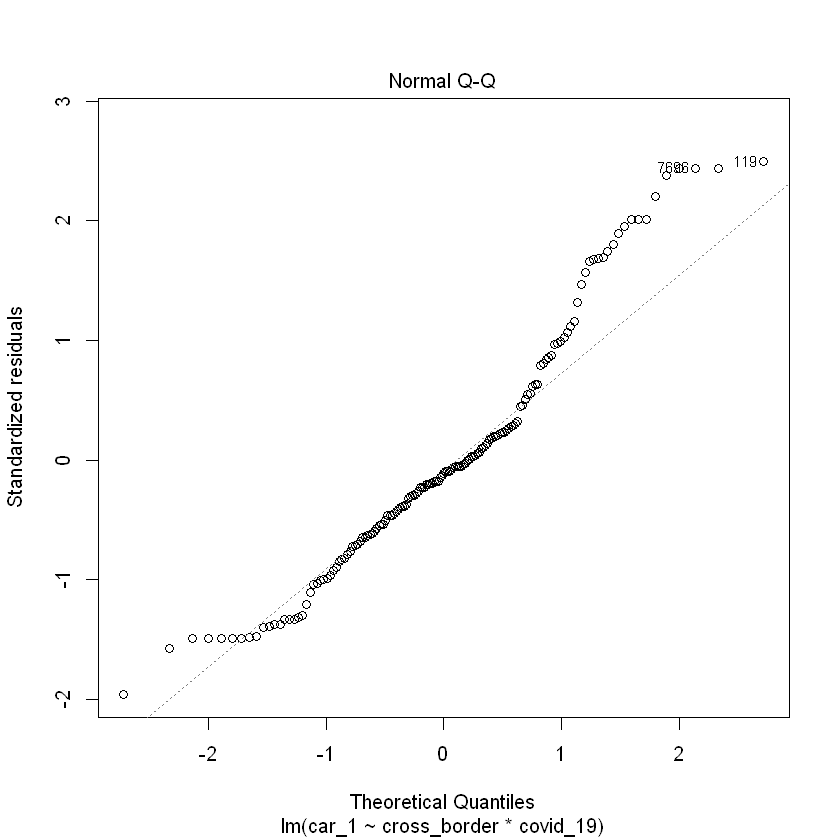

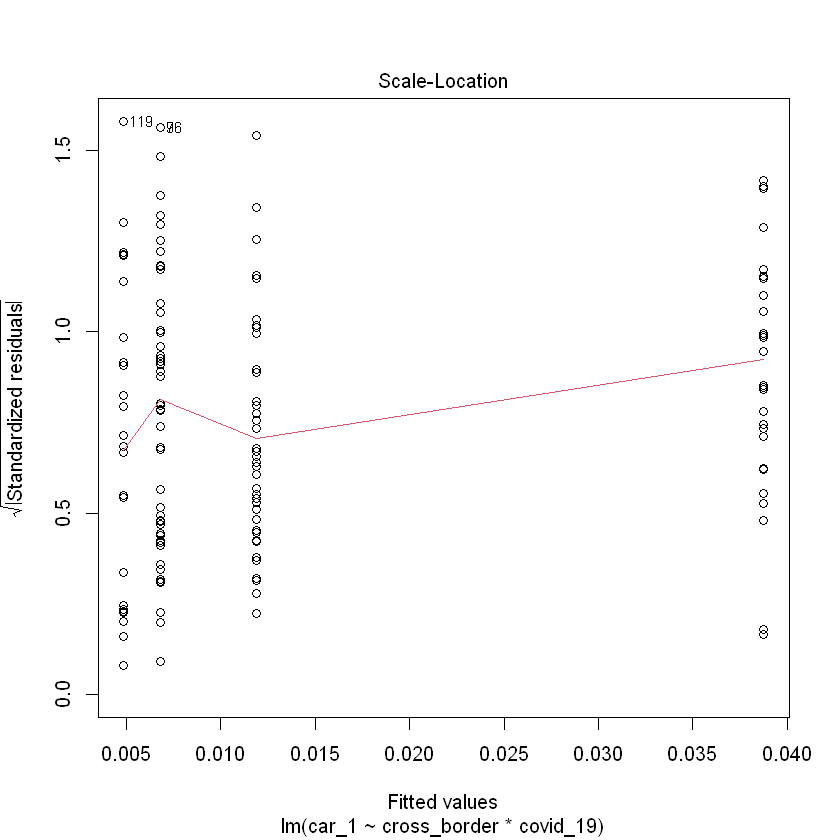

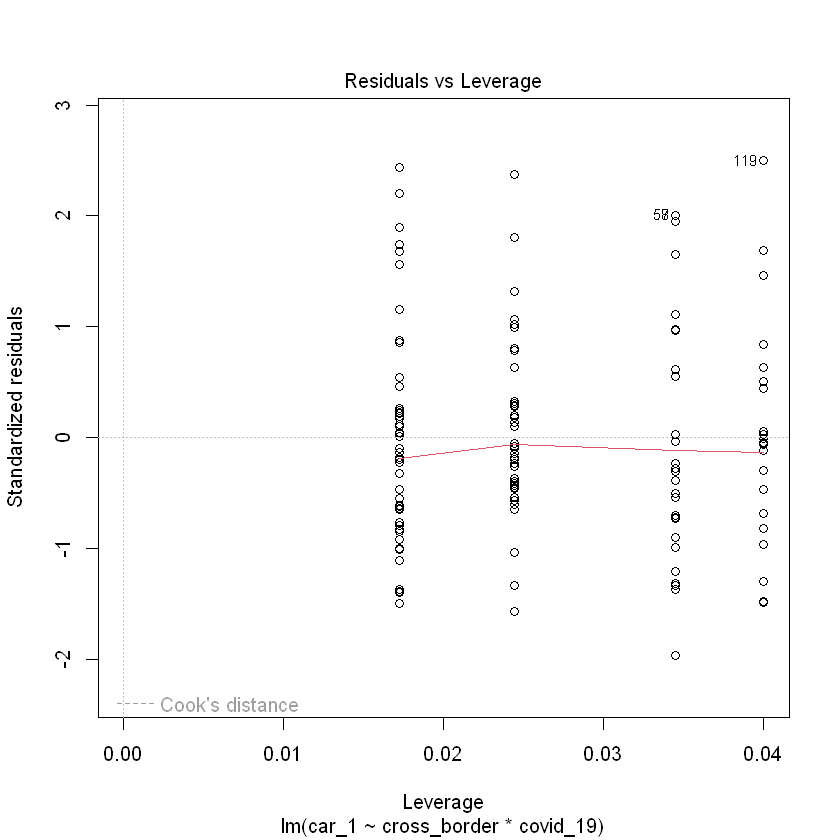

In [207]:
plot(mod9_CAR1)

In [190]:
mod9_CAR2 <- lm(car_2 ~ cross_border * covid_19, data = data)
summary(mod9_CAR2)


Call:
lm(formula = car_2 ~ cross_border * covid_19, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.192706 -0.061226 -0.005114  0.045486  0.267026 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)
(Intercept)              0.013759   0.016530   0.832    0.407
cross_border1            0.008367   0.025682   0.326    0.745
covid_191               -0.015315   0.021596  -0.709    0.479
cross_border1:covid_191 -0.010496   0.036067  -0.291    0.771

Residual standard error: 0.1058 on 149 degrees of freedom
Multiple R-squared:  0.009256,	Adjusted R-squared:  -0.01069 
F-statistic: 0.464 on 3 and 149 DF,  p-value: 0.7078


In [191]:
kable(extractCoefs(mod9_CAR2))



|Dependent |Coefficient             | Estimate| Std_error| T_value| P_value|
|:---------|:-----------------------|--------:|---------:|-------:|-------:|
|car_2     |COVID190                |    0.014|     0.017|   0.832|   0.407|
|car_2     |cross_border1           |    0.008|     0.026|   0.326|   0.745|
|car_2     |covid_191               |   -0.015|     0.022|  -0.709|   0.479|
|car_2     |cross_border1:covid_191 |   -0.010|     0.036|  -0.291|   0.771|

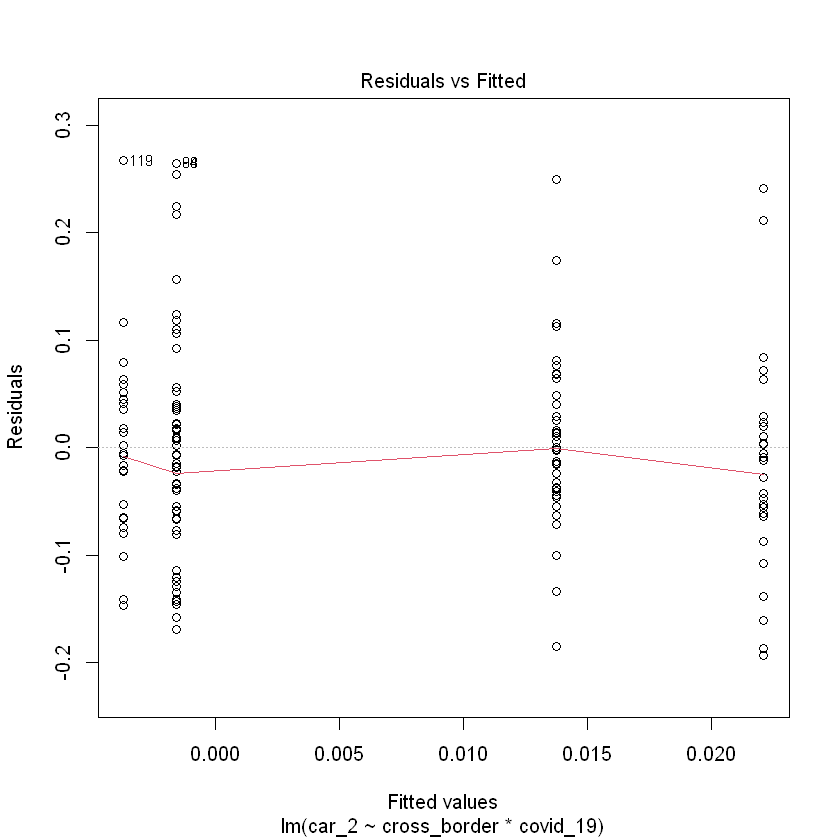

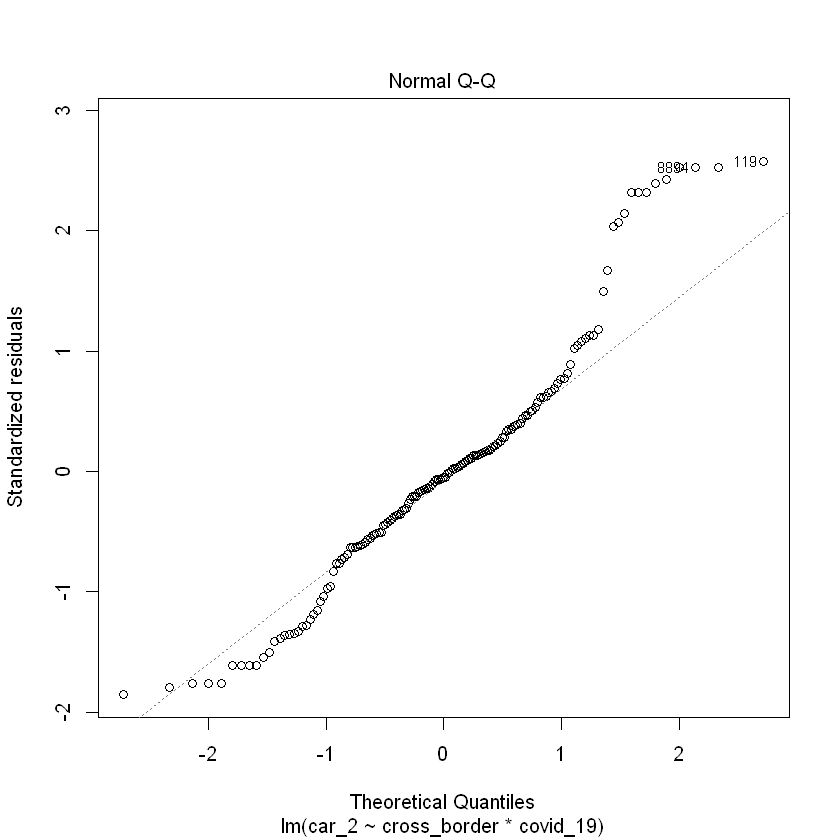

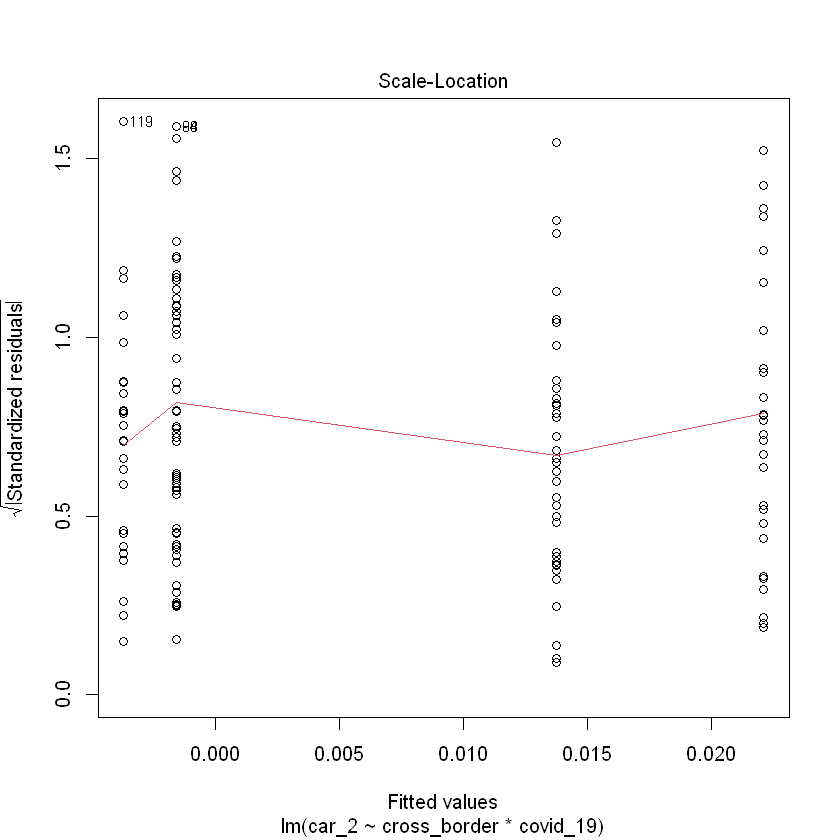

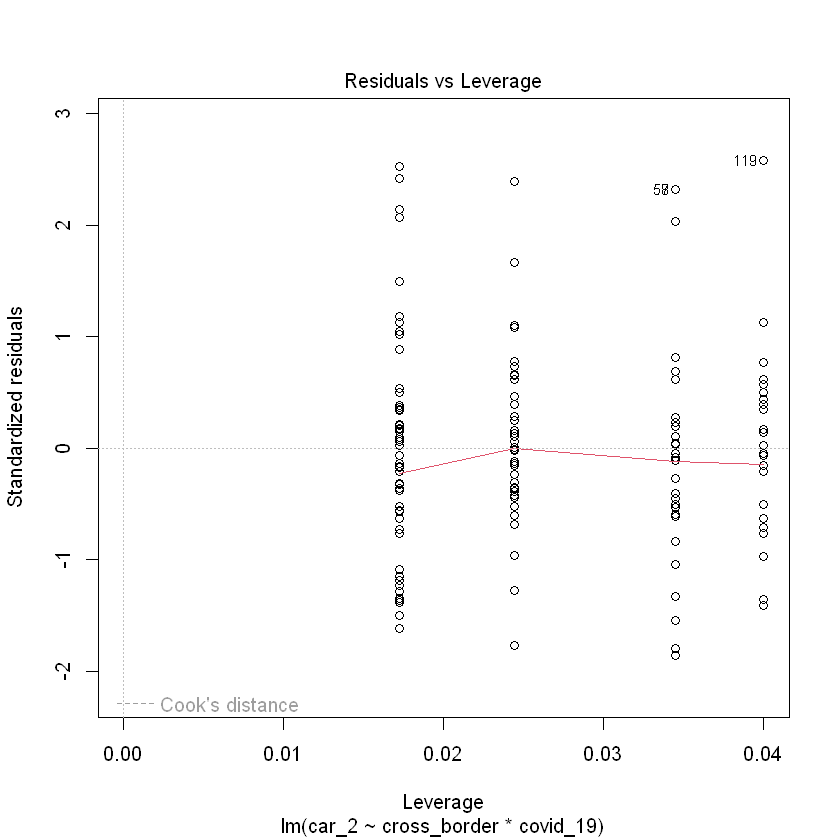

In [208]:
plot(mod9_CAR2)

## Response to hypothesis 5

No effect of local transcation on CAR observed.